# 💼 Customer Churn Analysis & Prediction in Retail Banking

---

### 🎯 Objective

The goal of this project is to **analyze customer churn behavior** in a retail bank and build **interpretable models** to predict which customers are at risk of leaving.  
Through **exploratory data analysis (EDA)** and **supervised machine learning**, we aim to uncover the key drivers behind churn and provide **actionable insights** for retention strategies.

---

### 📌 Key Questions Explored

- What demographic and behavioral traits are associated with customer churn?
- Can we predict churn with reasonable accuracy?
- Which features are most influential in driving customer exit?
- How can thresholds be tuned to prioritize recall or precision based on business needs?

---

### 🛠️ Tools & Techniques

- **EDA**: Pandas, Seaborn, Matplotlib  
- **Modeling**: Logistic Regression, Decision Tree, Random Forest, XGBoost  
- **Evaluation**: Precision, Recall, F1 Score, ROC-AUC, PR-AUC, Threshold tuning  
- **Interpretability**: Feature coefficients, odds ratios, model comparisons


## 1. Importing Data , Libraries & Overview of Data

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df=pd.read_csv("/content/drive/MyDrive/Customer Churn/Bank_Churn.csv")

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [7]:
df.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


## 2. Preprocessing

### Checking for Duplicates and Null Values


In [8]:
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [9]:
## Checking for Null Values

df.isnull().sum()

,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0
HasCrCard,0


In [10]:
# Checking for duplicates

df.duplicated().sum()

np.int64(0)

### Converting Gender column to numerical dtypes


In [11]:
df['Gender'].value_counts()

,count
Gender,
Male,5457
Female,4543


In [12]:
# Converting Categorical column to Numerical column

df['Gender']=df['Gender'].str.replace('Male','0')
df['Gender']=df['Gender'].str.replace('Female','1')

df['Gender']=df['Gender'].astype('int')

In [13]:
df['Gender'].value_counts()

,count
Gender,
0,5457
1,4543


In [14]:
# checking to see if the convserion has happened on the columns by seeing the datatypes

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  int64  
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(2)
memory usage: 1015.8+ KB


### Checking For Outliers

In [15]:
                                                                # Function to check number of Outlliers #



def plot_outliers_and_distribution_for_column(column_data):
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = column_data.quantile(0.25)
    Q3 = column_data.quantile(0.75)

    # Calculate IQR
    IQR = Q3 - Q1

    # Define outlier bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = column_data[(column_data < lower_bound) | (column_data > upper_bound)]

    # Print the number of outliers
    print(f"lower bound : {lower_bound}")
    print(f"upper bound : {upper_bound}")
    print(f"Number of outliers: {len(outliers)}")

    # Create a figure with 2 subplots: one for the boxplot and one for the distribution plot
    plt.figure(figsize=(12, 4))

    # Box plot
    plt.subplot(1, 2, 1)
    sns.boxplot(x=column_data)
    plt.title('Boxplot of the Feature')

    # Distribution plot (KDE plot)
    plt.subplot(1, 2, 2)
    sns.kdeplot(column_data, fill=True)
    plt.title('Distribution Plot (KDE)')

    # Show both plots
    plt.tight_layout()
    plt.show()

In [16]:
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,1,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,1,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,1,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,1,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,1,43,2,125510.82,1,1,1,79084.10,0


lower bound : 383.0
upper bound : 919.0
Number of outliers: 15


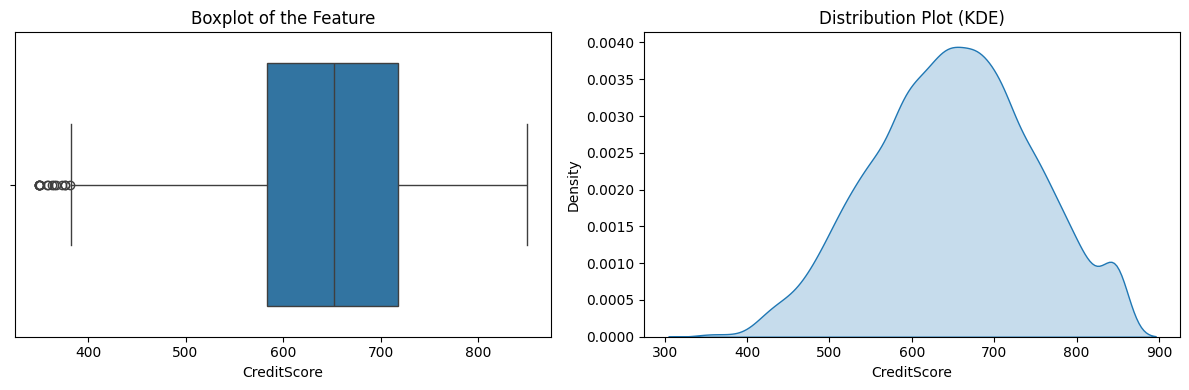

In [17]:
## checking outliers for Credit score column

plot_outliers_and_distribution_for_column(df['CreditScore'])

In [18]:
df[df['CreditScore']<383]['CreditScore'].value_counts()

,count
CreditScore,
350,5
376,2
363,1
359,1
358,1
351,1
365,1
367,1
382,1


 Although these values are classified as outliers (i.e., below the lower bound), they represent valid observations and are retained in the dataset and cannot be removed

lower bound : 14.0
upper bound : 62.0
Number of outliers: 359


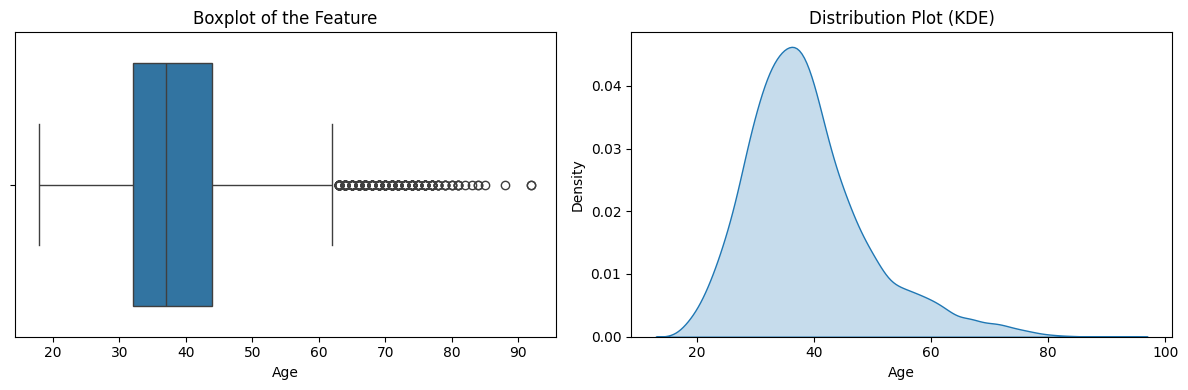

In [19]:
plot_outliers_and_distribution_for_column(df['Age'])

In [20]:
df[(df['Age']>62)&(df['Exited']==1)]['Age'].value_counts()

,count
Age,
63,18
64,12
65,8
71,7
66,7
68,6
67,5
70,4
69,2


 Although these values are classified as outliers (i.e., below the lower bound), they represent valid observations and are retained in the dataset and cannot be removed

lower bound : -3.0
upper bound : 13.0
Number of outliers: 0


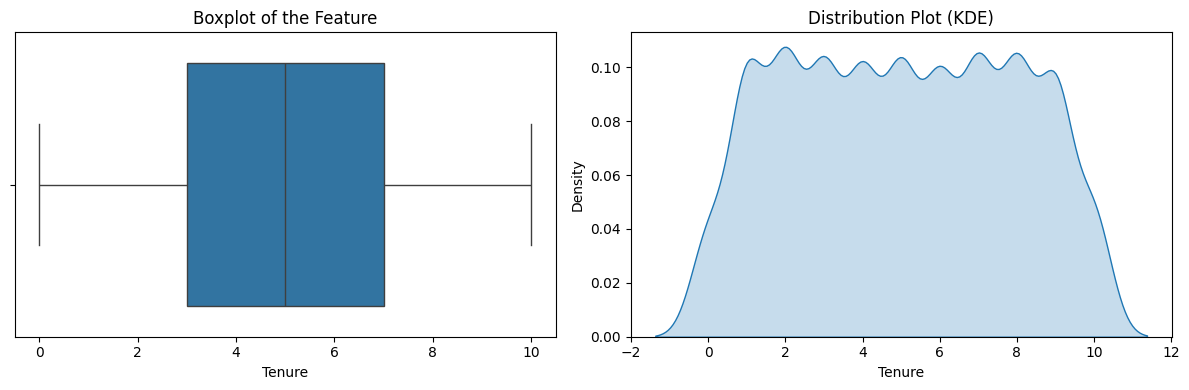

In [21]:
plot_outliers_and_distribution_for_column(df['Tenure'])

lower bound : -191466.36000000002
upper bound : 319110.60000000003
Number of outliers: 0


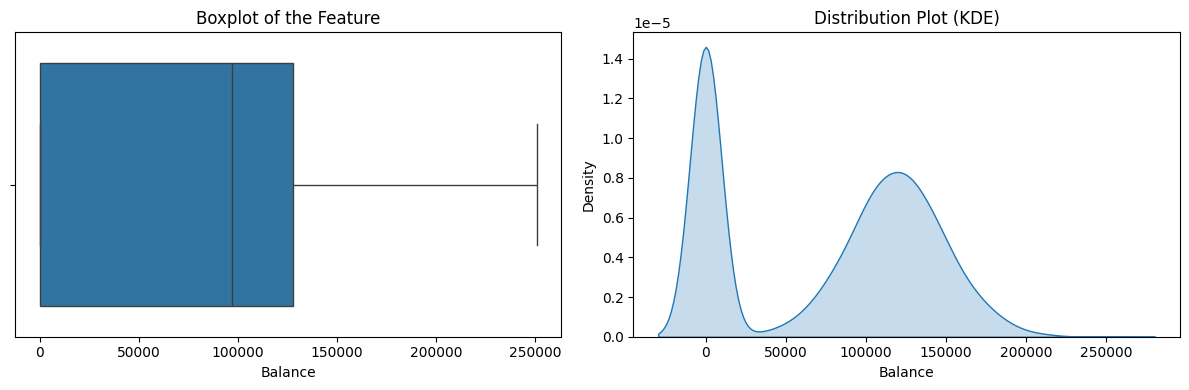

In [22]:
plot_outliers_and_distribution_for_column(df['Balance'])

lower bound : -96577.09624999999
upper bound : 296967.45375
Number of outliers: 0


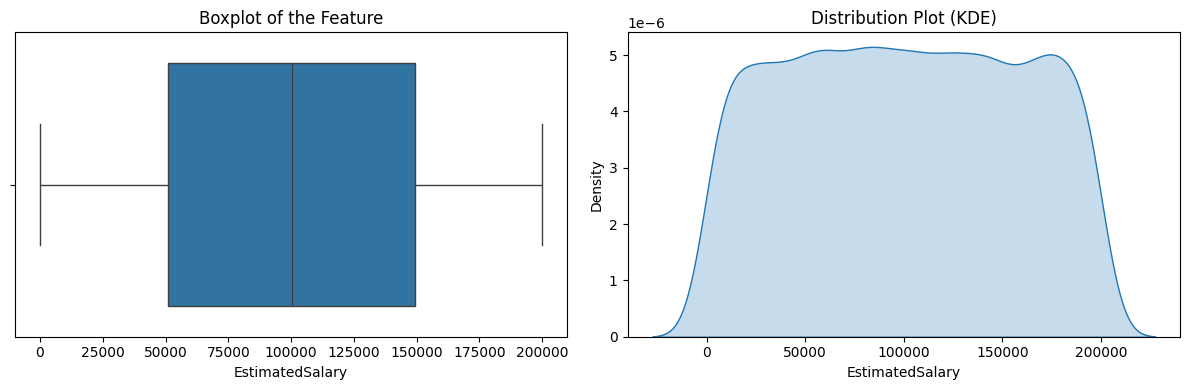

In [23]:
plot_outliers_and_distribution_for_column(df['EstimatedSalary'])

### One Hot Encoding & Creating 3 Datasets


In [24]:
## For analysing data and uncovering things about churn

df_ay=df.copy()

In [25]:
df['Geography'].value_counts()

,count
Geography,
France,5014
Germany,2509
Spain,2477


In [26]:
## Label encoding did not yield good results sticking to OHE ##

In [27]:
# Convert Gegraphy to one hot encoding but only using 2 columns to represent 3 cointries

dummies = pd.get_dummies(df['Geography'])

dummies = dummies.astype(int) # to convert bool to int

dummies=dummies.drop(columns=['Spain'])

df = pd.concat([df, dummies], axis=1)


# when France and Germany both ==0 then its Spain

In [28]:
# Considered encoding of Number of Products but it does not give better results in Tree based models , so only using it for Logistic Regression

# Converting Number of products to binary columns to align with assumptions of Logistic regression , Linearity in the logit

df['Products_Grouped'] = df['NumOfProducts'].replace({3: '3+', 4: '3+'}).astype(str)       # converting number of product subcribes greater than 3 to 3+

products_dummies = pd.get_dummies(df['Products_Grouped'], prefix='NumProducts')

products_dummies.drop('NumProducts_1', axis=1, inplace=True)

products_dummies=products_dummies.astype(int)

df = pd.concat([df, products_dummies], axis=1)

# When both 2 and 3+ columns are 0 → then it’s NumProducts_1

In [29]:
df=df.drop(columns=['NumOfProducts','Surname','Geography','Products_Grouped','CustomerId'])

#  Dropping 'Products_Grouped', 'NumOfProducts', and 'Geography' as their information is already captured through encoding.

## Dropping 'CustomerId' and 'Surname' as they do not carry predictive information and are not useful for analysis or modeling.


In [30]:
df.head()

,CreditScore,Gender,Age,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,NumProducts_2,NumProducts_3+
0,619,1,42,2,0.00,1,1,101348.88,1,1,0,0,0
1,608,1,41,1,83807.86,0,1,112542.58,0,0,0,0,0
2,502,1,42,8,159660.80,1,0,113931.57,1,1,0,0,1
3,699,1,39,1,0.00,0,0,93826.63,0,1,0,1,0
4,850,1,43,2,125510.82,1,1,79084.10,0,0,0,0,0


`Number of Products` encoding did not enhance performance in tree-based models, so it's excluded there.

It is retained for models like `Logistic Regression` where feature scaling and encoding have greater impact.

Creating a model-specific dataset version for tree-based algorithms, with only `Geography` one-hot encoded.

In [31]:
df1=df.copy()

In [32]:
df1.head()

,CreditScore,Gender,Age,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,NumProducts_2,NumProducts_3+
0,619,1,42,2,0.00,1,1,101348.88,1,1,0,0,0
1,608,1,41,1,83807.86,0,1,112542.58,0,0,0,0,0
2,502,1,42,8,159660.80,1,0,113931.57,1,1,0,0,1
3,699,1,39,1,0.00,0,0,93826.63,0,1,0,1,0
4,850,1,43,2,125510.82,1,1,79084.10,0,0,0,0,0



##### df_ay: data for EDA, where only Gender wher no OHE is done

##### df : data to be used for Linear models. where Country and Num_or_products have been OHE

##### df1 : data for Tree based models, where only Country is OHE

## 3. EDA

### Checking Distribution of Exited Column

In [35]:
churn_dist= df.Exited.value_counts(normalize=True)

churn_rate= churn_dist*100

print(churn_rate)

Exited
0    79.63
1    20.37
Name: proportion, dtype: float64


Baseline Churn Rate , The target variable `Exited` is imbalanced:
This imbalance highlights the importance of using appropriate metrics like **recall**, **F1-score**, or **AUC**, rather than relying solely on accuracy.


### Demographic Patterns and Activity Status


In [36]:
# Which customer demographics are more likely to churn?

ext=df_ay[df_ay['Exited']==1]

tot=ext.groupby('Geography')['Exited'].count()

tot

# Germany and France have the more count , beginning with Germany

,Exited
Geography,
France,810
Germany,814
Spain,413


<Axes: xlabel='Age', ylabel='Count'>

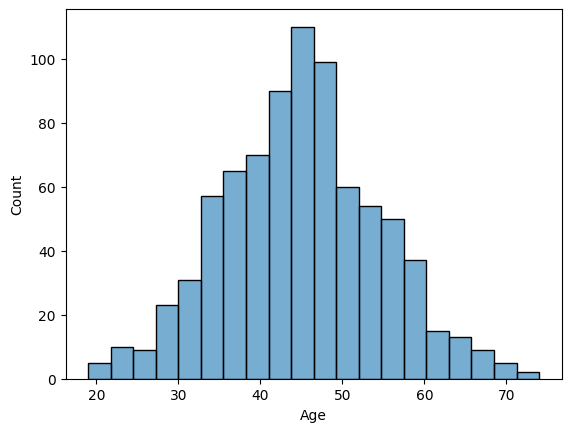

In [ ]:
## Checking what age category of churners are more

Ger=ext[ext['Geography']=='Germany']['Age']

sns.histplot(Ger,bins=20,alpha=0.6)

# based on the findings, majority lie in the 40 to 55 age group

In [45]:
# Filter only France
german_ages = ext[ext['Geography'] == 'Germany']['Age']

# Define age bins and labels
bins = [0, 20, 30, 40, 50, 60, 70, 90]  # Adjust as needed
labels = ['0-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71+']

# Apply pd.cut to bucket ages
age_buckets = pd.cut(german_ages, bins=bins, labels=labels, right=False)


age_buckets.value_counts().sort_index()

,count
Age,
0-20,1
21-30,46
31-40,188
41-50,334
51-60,194
61-70,45
71+,6


In [67]:
temp=ext[(ext['Geography']=='Germany') & (ext['Age']>=40) & (ext['Age']<=55)]

temp.head()

# filtering for the same

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
53,15702298,Parkhill,655,Germany,0,41,8,125561.97,1,0,0,164040.94,1
54,15569590,Yoo,601,Germany,0,42,1,98495.72,1,1,0,40014.76,1
172,15651022,Yost,480,Germany,0,44,10,129608.57,1,1,0,5472.70,1
179,15625426,Ashbolt,754,Germany,1,55,3,161608.81,1,1,0,8080.85,1
215,15723488,Watson,668,Germany,0,47,7,106854.21,1,0,1,157959.02,1


In [ ]:
# checking active memebers in the overall population to get baseline value

df['IsActiveMember'].value_counts(normalize=True)

,proportion
IsActiveMember,
1,0.5151
0,0.4849


In [ ]:
# checing the percentage of active members in germany in that age group

temp['IsActiveMember'].value_counts(normalize=True)

,proportion
IsActiveMember,
0,0.635974
1,0.364026


In [68]:
temp['CreditScore'].mean()

np.float64(643.2077087794432)

**Insight:** Among churned customers in Germany aged 40–55, **63.6%** are inactive, while overall the split is nearly 50/50. This indicates **inactivity is a key churn signal** in this demographic.

 ***Inactivity is a strong behavioral signal for churn in this segment, suggesting that increasing customer engagement may directly reduce churn.***


<Axes: xlabel='Age', ylabel='Count'>

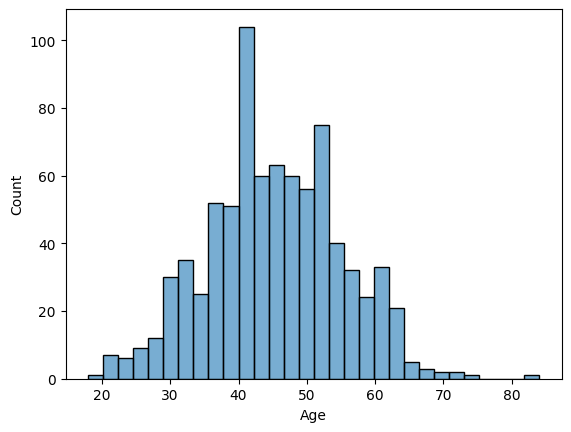

In [41]:
## Checking what age category of churners are more for France

Fra=ext[ext['Geography']=='France']['Age']

sns.histplot(Ger,bins=30,alpha=0.6)

In [44]:
# Filter only France
france_ages = ext[ext['Geography'] == 'France']['Age']

# Define age bins and labels
bins = [0, 20, 30, 40, 50, 60, 70, 90]  # Adjust as needed
labels = ['0-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71+']

# Apply pd.cut to bucket ages
age_buckets = pd.cut(france_ages, bins=bins, labels=labels, right=False)


age_buckets.value_counts().sort_index()

# age groups greater than 30 and less than 60 with highest in 41-50 are the higest churners

,count
Age,
0-20,1
21-30,44
31-40,183
41-50,317
51-60,197
61-70,62
71+,6


In [65]:
temp=ext[(ext['Geography']=='France') & (ext['Age']>=30) & (ext['Age']<=60)]

In [51]:
temp['IsActiveMember'].value_counts(normalize=True)

,proportion
IsActiveMember,
0,0.631433
1,0.368567


**Conclusion:** Similar to  churned customers in Germany aged in the 40–55, the same stats follow for `France` as Well, `63.14%` are inactive, while overall the split is nearly 50/50. This indicates **inactivity is a key churn signal** in this demographic too.

`Inactivity is a strong behavioral signal for churn in this segment too, suggesting that increasing customer engagement may directly reduce churn.`

##### Deep Dive: Credit Card Ownership



In [39]:
temp1=df_ay[(df_ay['Geography'] == 'Germany') & (df['Age'] >= 40) & (df['Age'] <= 55)]


temp1=temp.groupby(['HasCrCard', 'IsActiveMember'])['Exited'].agg(['sum', 'count']).reset_index()

temp1['churn_rate']=temp1['sum'] / temp1['count']

temp1

,HasCrCard,IsActiveMember,sum,count,churn_rate
0,0,0,81,81,1.0
1,0,1,63,63,1.0
2,1,0,216,216,1.0
3,1,1,107,107,1.0


Initial analysis showed that **inactive customers churn more** across the board.

However, when combining engagement with credit card ownership, suggests that credit card ownership is only meaningful when paired with customer engagement. Inactive users are at high churn risk regardless of card status.

### Churn Behavior by Product Usage and Credit Card Status

In [98]:
df_ay['HasCrCard'].value_counts(normalize=True)

,proportion
HasCrCard,
1,0.7055
0,0.2945


In [83]:
temp=df_ay[df_ay['Exited']==1]

In [99]:
temp['HasCrCard'].value_counts(normalize=True)

,proportion
HasCrCard,
1,0.699067
0,0.300933


`Customer subcribing to Creditcard or not does not affect the churn`

In [81]:
df_ay['NumOfProducts'].value_counts(normalize=True)

,proportion
NumOfProducts,
1,0.5084
2,0.4590
3,0.0266
4,0.0060


In [89]:
temp['NumOfProducts'].value_counts(normalize=True)

,proportion
NumOfProducts,
1,0.691703
2,0.170839
3,0.108002
4,0.029455


Single-Product Customers Are Much More Likely to Churn

- In the overall dataset, **50.8%** of customers have just 1 product,among churned customers, this jumps to **69.2%**

- In contrast, customers with 2 products make up **45.9%** of the total population but only **17%** of churners.

This supports the idea that customers with only 1 product are `less engaged and more likely to leave`. Promoting additional product adoption could be an effective retention strategy.


In [101]:
df_ay.groupby(['HasCrCard','NumOfProducts'])['Exited'].count()

HasCrCard  NumOfProducts
0          1                1506
           2                1344
           3                  76
           4                  19
1          1                3578
           2                3246
           3                 190
           4                  41
Name: Exited, dtype: int64

In [96]:
temp.groupby(['HasCrCard','NumOfProducts'])['Exited'].count()

HasCrCard  NumOfProducts
0          1                418
           2                112
           3                 64
           4                 19
1          1                991
           2                236
           3                156
           4                 41
Name: Exited, dtype: int64

Among churned customers, those with only 1 product make up the largest share, regardless of credit card ownership:

- Customers with **1 product** account for **~72% of churn** in both credit card groups

- Churn sharply decreases for those with 2 or more products

This reinforces that `low product engagement (1 product)` is a major churn risk, `independent of credit card usage`. Encouraging cross-selling to move customers beyond 1 product may improve retention.


### VIF and Corelation With Target Variable



 VIF and correlation checks are performed only for linear models to address multicollinearity.

*These are not required for tree-based models.*

In [73]:
df_features = df.drop(columns=['Exited'])
df_target = df['Exited']

# Calculate the correlation of features with the target
correlation_with_target = df_features.corrwith(df_target)

# Convert the result to a DataFrame for easier visualization
correlation_df = pd.DataFrame({'Feature': correlation_with_target.index,
    'Correlation with Exited': correlation_with_target.values
})

# Sort the correlation values in descending order
correlation_df = correlation_df.sort_values(by='Correlation with Exited', ascending=False)

correlation_df

,Feature,Correlation with Exited
11,NumProducts_3+,0.298637
2,Age,0.285323
9,Germany,0.173488
4,Balance,0.118533
1,Gender,0.106512
7,EstimatedSalary,0.012097
5,HasCrCard,-0.007138
3,Tenure,-0.014001
0,CreditScore,-0.027094
8,France,-0.104955


/tmp/ipython-input-76-2194786991.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


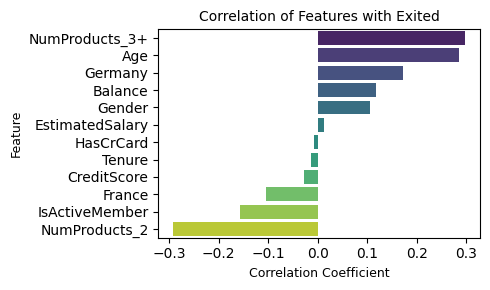

In [76]:
# Plotting the COrelation

plt.figure(figsize=(5, 3))

sns.barplot(
    x='Correlation with Exited',
    y='Feature',
    data=correlation_df,
    palette='viridis',

)

plt.title('Correlation of Features with Exited', fontsize=10)
plt.xlabel('Correlation Coefficient', fontsize=9)
plt.ylabel('Feature', fontsize=9)

plt.tight_layout()

plt.show()


***Summary of the findings***

Strongest positive correlations: NumProducts_3+, Age, Germany.
Features like EstimatedSalary and CreditScore show weak correlation.


`Customers with 3 or more products, higher age, or from Germany are more likely to churn, similar to the analysis from before.`

`Customers with exactly 2 products or who are active members are less likely to churn.`

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools import add_constant


# Create a DataFrame of the predictors (only the continuous columns)
X = df.drop(columns=['Exited'])

# Add a constant to the predictors for intercept calculation in VIF formula
X_const = add_constant(X)

# Calculate the VIF for each feature
vif = pd.DataFrame()
vif['Feature'] = X_const.columns
vif['VIF'] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]

# Print the VIF values
print(vif)

print(vif['VIF'].sum())

            Feature        VIF
0             const  77.347009
1       CreditScore   1.001166
2            Gender   1.004603
3               Age   1.027109
4            Tenure   1.001923
5           Balance   1.398955
6         HasCrCard   1.001591
7    IsActiveMember   1.012923
8   EstimatedSalary   1.000955
9            France   1.508871
10          Germany   1.725410
11    NumProducts_2   1.220497
12   NumProducts_3+   1.045299
91.29631059299983


 VIF values are low (< 2 for all features), indicating no significant multicollinearity - good for linear models

## 4. Modelling

### 4.1 Train Test Split

#### Data For Linear Models


In [83]:
X=df.drop(columns=['Exited'])
y=df['Exited']

In [84]:
X.columns

Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'France', 'Germany',
       'NumProducts_2', 'NumProducts_3+'],
      dtype='object')

In [85]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# # Scale the  training data (using StandardScaler) - for linear models
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# fit_transform on training data: The scaler learns the parameters from the training data and scales the training data.

# transform on test data: The scaler applies the same scaling using the parameters it learned from the training set,
# without altering those parameters.

In [86]:
print(X.shape, y.shape, X_train_scaled.shape, y_train.shape)
print(X_test_scaled.shape,y_test.shape)

print("\n")

print(y.value_counts(), y_train.value_counts())
print(y_test.value_counts())

(10000, 12) (10000,) (8000, 12) (8000,)
(2000, 12) (2000,)


Exited
0    7963
1    2037
Name: count, dtype: int64 Exited
0    6356
1    1644
Name: count, dtype: int64
Exited
0    1607
1     393
Name: count, dtype: int64


#### Tree Based Data

In [87]:
X1=df1.drop(columns=['Exited'])
y1=df1['Exited']

In [88]:
X1.columns

Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'France', 'Germany',
       'NumProducts_2', 'NumProducts_3+'],
      dtype='object')

In [89]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split the data into training and testing sets
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X1, y1, test_size=0.2, random_state=42)

X_train_scaled_1=X_train_1
X_test_scaled_1=X_test_1


# Scale the Data # No scaling required as non scaled data gave almost same results

# scaler = StandardScaler()
# X_train_scaled_1 = scaler.fit_transform(X_train_1)
# X_test_scaled_1 = scaler.transform(X_test_1)

In [90]:
print(X1.shape, y1.shape, X_train_scaled_1.shape, y_train_1.shape)
print(X_test_scaled_1.shape,y_test_1.shape)

print("\n")

print(y1.value_counts(), y_train_1.value_counts())
print(y_test_1.value_counts())

(10000, 12) (10000,) (8000, 12) (8000,)
(2000, 12) (2000,)


Exited
0    7963
1    2037
Name: count, dtype: int64 Exited
0    6356
1    1644
Name: count, dtype: int64
Exited
0    1607
1     393
Name: count, dtype: int64


### Modeling Strategy
We applied multiple classification algorithms to predict customer churn using the features identified in EDA and preprocessing. Each model follows a structured evaluation flow:
- Model performance with best parameters
- Precision-Recall tuning and threshold selection
- ROC and AUC assessment
- Feature importance (if applicable)

This structure allows consistent comparison across models while maintaining interpretability.


### 4.2 -> Model 1 : Logictic Regression Using Scikit Learn Library

#### 🔍 Model Performance

This section implements logistic regression using scikit-learn. We evaluate model performance using classification metrics and prepare for further optimization and threshold tuning.

In [91]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import StratifiedKFold

# Initialize the model
model_lr = LogisticRegression(penalty=None,class_weight='balanced',solver='saga',max_iter=100)

# Fit the model to the training data
model_lr.fit(X_train_scaled,y_train)


#Training results
y_train_pred=model_lr.predict(X_train_scaled)

# Calculate train accuracy, precision, recall, and F1 score
accuracy = accuracy_score(y_train, y_train_pred)*100
precision = precision_score(y_train, y_train_pred)*100
recall = recall_score(y_train, y_train_pred)*100
f1 = f1_score(y_train, y_train_pred)*100

print(f"Train Accuracy: {accuracy:.4f}")
print(f"Train Precision: {precision:.4f}")
print(f"Train Recall: {recall:.4f}")
print(f"Train F1 Score: {f1:.4f}")
print('\n')


# Make predictions on the test set
y_test_pred = model_lr.predict(X_test_scaled)

# Calculate test accuracy, precision, recall, and F1 score
test_accuracy = accuracy_score(y_test, y_test_pred)*100
test_precision = precision_score(y_test, y_test_pred)*100
test_recall = recall_score(y_test, y_test_pred)*100
test_f1 = f1_score(y_test, y_test_pred)*100

# Print the test metrics
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Precision: {test_precision:.4f}")
print(f"Test Recall: {test_recall:.4f}")
print(f"Test F1 Score: {test_f1:.4f}")
print('\n')

# Confusion matrix for the test set
conf_matrix = confusion_matrix(y_test, y_test_pred)
print(f"Confusion Matrix (Test Set):\n{conf_matrix}")
print('\n')


# Cross-validation with Stratified K-Fold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cross_val_accuracy = cross_val_score(model_lr, X_train_scaled, y_train, cv=cv, scoring='accuracy')

# Cross-validation precision and recall
y_cv_pred = cross_val_predict(model_lr, X_train_scaled, y_train, cv=cv)
precision_cv = precision_score(y_train, y_cv_pred)
recall_cv = recall_score(y_train, y_cv_pred)
f1_cv = f1_score(y_train, y_cv_pred)

print(f"Mean Cross-validation accuracy: {np.mean(cross_val_accuracy):.4f}")
print(f"Precision from cross-validation: {precision_cv:.4f}")
print(f"Recall from cross-validation: {recall_cv:.4f}")
print(f"F1 Score from cross-validation: {f1_cv:.4f}")

Train Accuracy: 76.0250
Train Precision: 44.9743
Train Recall: 74.5742
Train F1 Score: 56.1098


Test Accuracy: 76.5500
Test Precision: 44.4118
Test Recall: 76.8448
Test F1 Score: 56.2908


Confusion Matrix (Test Set):
[[1229  378]
 [  91  302]]


Mean Cross-validation accuracy: 0.7605
Precision from cross-validation: 0.4500
Recall from cross-validation: 0.7445
F1 Score from cross-validation: 0.5610


In [71]:
# To check auc_all values after removing features , AUC should increase after removing redundant features

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score

model = LogisticRegression(penalty='l1',class_weight='balanced',solver='saga',C=0.1,max_iter=100)
auc_all = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='roc_auc')
print("AUC with all features:", auc_all.mean())

AUC with all features: 0.8318648168869321


In [72]:
# AUC with all features: 0.8318667332779033

# # afrer rmoving 3 features 'EstimatedSalary','HasCrCard','Balance'

# AUC: 0.8323184069784716

# # afrer rmoving 3 features 'EstimatedSalary','HasCrCard','Balance' and Tenure

# AUC with all features: 0.8323425121998145

#### 🔧 Hyperparameter Tuning

Logistic regression is tuned using `GridSearchCV` to optimize regularization parameters.This step is commented out to save runtime.


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Define the Logistic Regression model
model = LogisticRegression(class_weight='balanced')

# Define the parameter grid to search over
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l1','l2'],  # L2 is the most common regularization for Logistic Regression
    'solver': ['liblinear','saga'],  # 'liblinear' is suitable for small datasets
    'max_iter': [100, 200, 300]  # Number of iterations for the solver
}

# Use GridSearchCV to search over the hyperparameters
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='f1', n_jobs=-1)

# Fit the model on the training data
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters and the best model
print("Best Hyperparameters: ", grid_search.best_params_)

# Use the best model to predict
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)

# Evaluate the model
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


Best Hyperparameters:  {'C': 0.01, 'max_iter': 100, 'penalty': 'l1', 'solver': 'saga'}
              precision    recall  f1-score   support

           0       0.93      0.76      0.84      1607
           1       0.44      0.76      0.56       393

    accuracy                           0.76      2000
   macro avg       0.68      0.76      0.70      2000
weighted avg       0.83      0.76      0.78      2000

[[1224  383]
 [  94  299]]


#### 🎯 Precision-Recall Curve and Threshold Tuning

Since the dataset is imbalanced, the default threshold of 0.5 may not be optimal. This section evaluates performance at different thresholds using the precision-recall curve and selects a threshold that improves recall while balancing precision.


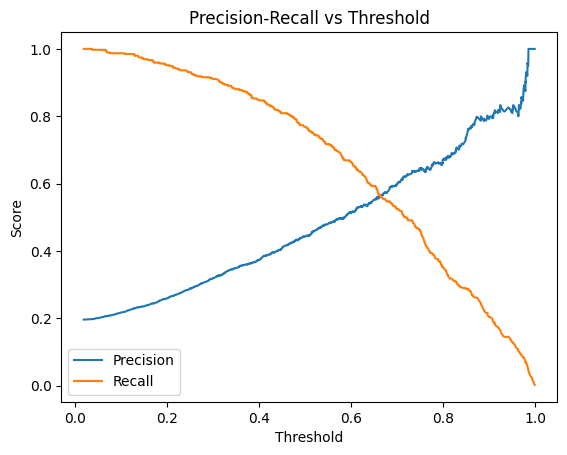



AUC for precison recall: 0.60192411678847


Best_threshold : 0.46333855894196563
Precision at new threshold: 0.4204244031830239
Recall at new threshold: 0.806615776081425
F1 Score at new threshold: 0.5527462946817786
Confusion Matrix at new threshold:
 [[1170  437]
 [  76  317]]


In [106]:
from sklearn.metrics import precision_recall_curve , auc
# from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix


# Get predicted probabilities for the positive class (churning)
y_pred_prob = model_lr.predict_proba(X_test_scaled)[:, 1]

# Calculate precision and recall for different thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)

# Slice off the last element of precision and recall to match the size of thresholds
precision = precision[:-1]  # Remove last element
recall = recall[:-1]  # Remove last element

# Plot precision-recall curve
plt.plot(thresholds, precision, label='Precision')
plt.plot(thresholds, recall, label='Recall')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.legend()
plt.title('Precision-Recall vs Threshold')
plt.show()
print('\n')


roc_auc = auc(recall, precision)
print("AUC for precison recall:", roc_auc)
print('\n')

# Find the threshold where both precision and recall are reasonably high
#  (e.g., recall >= 0.75 and precision >= 0.75) , # Get thresholds where recall and precision are both high

threshold_candidates = thresholds[(recall >= 0.80) & (precision >= 0.42)]

if len(threshold_candidates) > 0:
    best_threshold = threshold_candidates[0]  # Pick the first threshold that meets the criteria
    print("Best_threshold :",best_threshold)

    # Adjust the predictions based on the new threshold
    y_pred_adjusted = (y_pred_prob >= best_threshold).astype(int)

    # Evaluate the model using the new threshold
    print("Precision at new threshold:", precision_score(y_test, y_pred_adjusted))
    print("Recall at new threshold:", recall_score(y_test, y_pred_adjusted))
    print("F1 Score at new threshold:", f1_score(y_test, y_pred_adjusted))
    print("Confusion Matrix at new threshold:\n", confusion_matrix(y_test, y_pred_adjusted))
else:
    print("No threshold found where both precision and recall are >= 0.75.")


#### 📈 ROC Curve and AUC Evaluation

To assess the model's overall discriminatory ability, we plot the Receiver Operating Characteristic (ROC) curve and compute the Area Under the Curve (AUC) score. AUC provides a threshold-independent evaluation metric for classification performance.


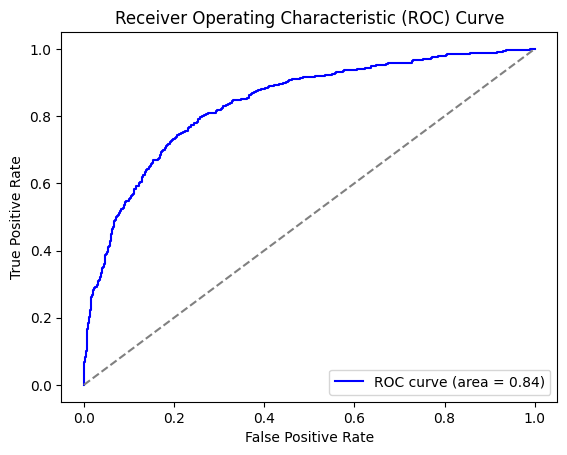

Best threshold based on ROC curve: 0.4806357215238544
AUC 0.8382822606567008
Precision at ROC threshold: 0.43375174337517436
Recall at ROC threshold: 0.7913486005089059
F1 Score at ROC threshold: 0.5603603603603604
Confusion Matrix at ROC threshold:
 [[1201  406]
 [  82  311]]


In [97]:
from sklearn.metrics import roc_curve, auc
# from  sklearn.metrics import precision_score , recall_score, f1_score, confusion_matrix

# Get predicted probabilities for the positive class (churning)
# [:, 1] selects the probability for the positive class

y_pred_prob = model_lr.predict_proba(X_test_scaled)[:, 1]

# Compute the ROC curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calculate the AUC (Area Under the Curve)

roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random classifier line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# To find the best threshold based on the ROC curve
# Example: Select the threshold that maximizes (tpr - fpr), or use any other criteria
best_threshold_idx = np.argmax(tpr - fpr)
best_threshold = thresholds[best_threshold_idx]

print("Best threshold based on ROC curve:", best_threshold)

# Adjust the predictions based on the new threshold
y_pred_adjusted_roc = (y_pred_prob >= best_threshold).astype(int)

# Evaluate the model using the new threshold
print("AUC",roc_auc)
print("Precision at ROC threshold:", precision_score(y_test, y_pred_adjusted_roc))
print("Recall at ROC threshold:", recall_score(y_test, y_pred_adjusted_roc))
print("F1 Score at ROC threshold:", f1_score(y_test, y_pred_adjusted_roc))
print("Confusion Matrix at ROC threshold:\n", confusion_matrix(y_test, y_pred_adjusted_roc))


#### 🧠 Feature Importance and Interpretability (Coefficients & Odds Ratios)

Logistic regression provides interpretable coefficients that describe the log-odds impact of each feature on the churn probability.

In [47]:

# Assuming 'model' is your fitted logistic regression model
coefficients = model_lr.coef_[0]  # Coefficients of the model
feature_names = X_train.columns  # List of feature names (train dataset columns)

# Create a dataframe of features and their corresponding coefficients
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

# Sort by absolute value of the coefficient to see which features are most influential
# coef_df['Abs_Coefficient'] = coef_df['Coefficient'].abs()
# coef_df = coef_df.sort_values(by='Abs_Coefficient', ascending=False)

# Calculate the odds ratios
odds_ratios = np.exp(coef_df['Coefficient'])

# Add them to the coefficient dataframe
coef_df['Odds Ratio'] = odds_ratios

coef_df['% Change in Odds'] = (coef_df['Odds Ratio'] - 1) * 100

coef_df


# - Coefficient: Increase in log-odds per unit change
# - Odds Ratio: Exponential of the coefficient, easier to interpret
# - % Change in Odds**: How much more or less likely churn becomes with a unit change


,Feature,Coefficient,Odds Ratio,% Change in Odds
0,CreditScore,-0.071844,0.930676,-6.932358
1,Gender,0.279915,1.323018,32.301755
2,Age,0.778739,2.178722,117.872226
3,Tenure,-0.056194,0.945356,-5.464419
4,Balance,0.001483,1.001484,0.148399
5,HasCrCard,-0.024483,0.975815,-2.418540
6,IsActiveMember,-0.482260,0.617387,-38.261324
7,EstimatedSalary,0.003150,1.003155,0.315472
8,France,-0.064291,0.937733,-6.226748
9,Germany,0.341817,1.407502,40.750219


📊 Logistic Regression Coefficients & Interpretability

The odds ratio analysis reveals several strong predictors of churn:

- **Age** has the highest impact: for every unit increase, the odds of churn increase by **118%**.
- **Inactivity** significantly increases churn risk: active members are **38% less likely** to churn.
- Customers with **2 products** are **53% less likely** to churn — aligning with earlier EDA findings.
- Being from **Germany** increases churn odds by **41%**, while **France** slightly reduces it.
- Gender also plays a role: males are **32% more likely** to churn in this model.

Other variables like credit score, tenure, and salary have a more modest influence.

This interpretability confirms that the model aligns well with the business context — helping identify high-risk customer segments based on actionable features.


- In linear regression, the coefficient means: for each unit increase in X, Y increases by b units.

- In logistic regression, the coefficient means: for each unit (or std dev) increase in X, the log-odds of Y=1 changes by b.

- Use odds ratio (exp(coef)) to measure how big that effect is

In [48]:
## taking an example to see what 1 unit measure is :

X_train['Age'].std()

10.518953179119055

Since features were standardized, each coefficient reflects the effect of a **1 standard deviation increase**. For example:

- `Age` has a standard deviation of ~10.5 years.
- Its coefficient (0.78) implies that a **10.5-year increase in age more than doubles** the odds of churn (odds ratio = 2.18 or +118%).

- For binary and one-hot encoded categorical variables, the interpretation remains the same (e.g., Male vs. Female, Active vs. Inactive).

This confirms that **older customers** are significantly more likely to churn.


#### 🥇  Logistic Regression Summary

Logistic Regression, though simple and interpretable, delivered solid performance for this churn prediction problem. Threshold tuning allowed the model to reach over **80% recall**, which is beneficial in identifying potential churners proactively. This model also serves as a benchmark for comparison against more complex models.
The transparency of this model makes it especially useful for stakeholders seeking **explainable AI**.

### 4.2.2 -> Logictic Regression Using Stats Model

#### 📌 Logistic Regression Assumptions




- **No multicollinearity**: VIF values from previous analysis are all < 2, indicating no severe multicollinearity.
- **Linearity of log-odds**: Verified using logit plots. All continuous features showed approximately linear relationships except `Number of Products`, which was converted to binary columns.
- **Independence of observations**: Dataset has no repeated customers or time component; independence assumed valid.
- **Large sample size**: Total sample size is 10,000, which satisfies the requirement for asymptotic inference despite class imbalance.

✅ *All key assumptions for logistic regression are met.*

In [41]:
# Creating function to check Linearity of Log odds of the Continous Features


from sklearn.linear_model import LogisticRegression

def smoothed_logit_plot(df, target_col, cont_features):
    for feature in cont_features:
        # Fit logistic regression on the single feature
        X = df[[feature]].dropna()
        y = df[target_col].loc[X.index]

        model = LogisticRegression().fit(X, y)
        pred_proba = model.predict_proba(X)[:, 1]
        log_odds = np.log(pred_proba / (1 - pred_proba))

        # Plot the smoothed relationship
        plt.figure(figsize=(6, 4))
        sns.regplot(x=X[feature], y=log_odds, lowess=True, scatter_kws={'s': 10}, line_kws={'color': 'red'})
        plt.title(f'Smoothed Log-Odds vs {feature}')
        plt.xlabel(feature)
        plt.ylabel('Predicted Log-Odds')
        plt.grid(True)
        plt.tight_layout()
        plt.show()


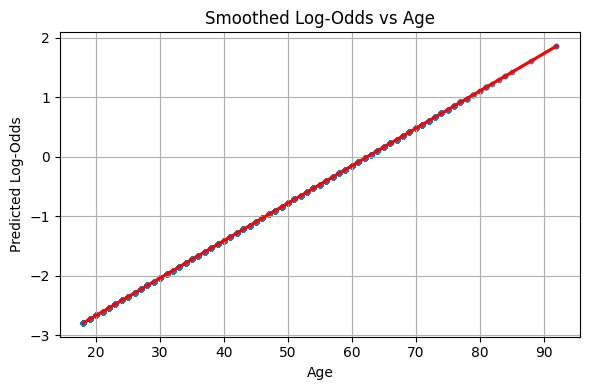

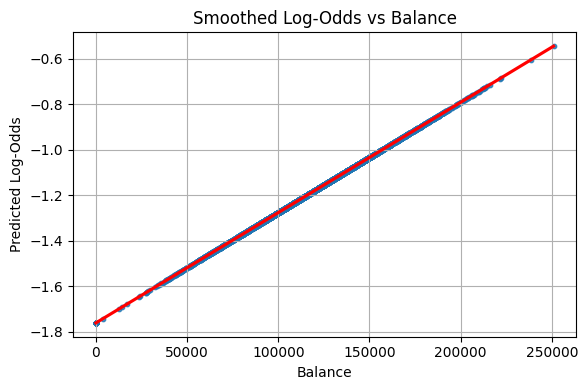

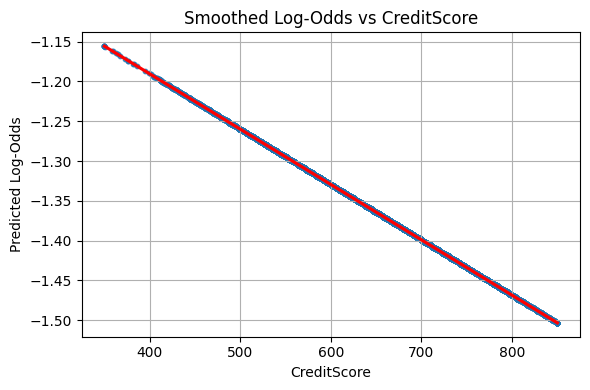

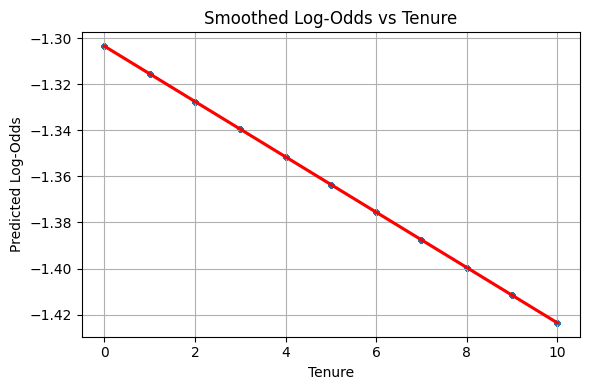

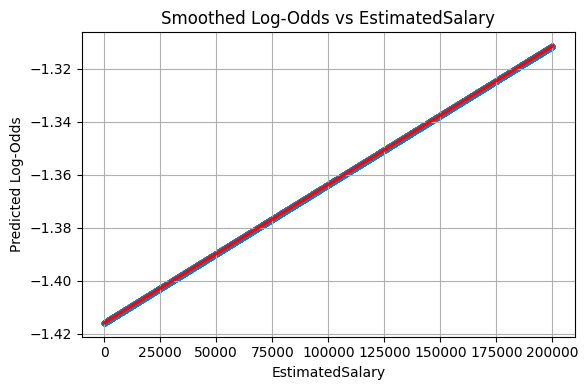

In [42]:
cont_features = ['Age', 'Balance', 'CreditScore', 'Tenure', 'EstimatedSalary']

smoothed_logit_plot(df, target_col='Exited', cont_features=cont_features)

In [ ]:
from sklearn.linear_model import LogisticRegression

X = df[['Age']]
y = df['Exited']

model = LogisticRegression().fit(X, y)
pred_proba = model.predict_proba(X)[:, 1]
pred_proba_1=(pred_proba / (1 - pred_proba))
log_odds = np.log(pred_proba / (1 - pred_proba))

In [ ]:
model.predict_proba(X)[:,1]

array([0.21671304, 0.20621885, 0.21671304, ..., 0.15941415, 0.21671304,
       0.10283154])

In [ ]:
# pred_proba_1
ap=pd.DataFrame({'prob':pred_proba_1,'log_odds':log_odds})
ap.describe()


,prob,log_odds
count,10000.000000,10000.000000
mean,0.300562,-1.478682
std,0.331872,0.660152
min,0.061078,-2.795599
25%,0.147434,-1.914373
50%,0.201967,-1.599649
75%,0.313789,-1.159036
max,6.438608,1.862312


In [ ]:
log_odds

array([-1.28492505, -1.34786979, -1.28492505, ..., -1.66259353,
       -1.28492505, -2.1661515 ])

In [ ]:
model.predict_proba(X)

array([[0.78328696, 0.21671304],
       [0.79378115, 0.20621885],
       [0.78328696, 0.21671304],
       ...,
       [0.84058585, 0.15941415],
       [0.78328696, 0.21671304],
       [0.89716846, 0.10283154]])

#### Applying the Stats Model and obtaining Insights


In [43]:
import statsmodels.api as sm
import pandas as pd

# Ensure y_train is a pandas Series (if it's not already)
# And make sure it has the same index as X_train
y_train = pd.Series(y_train, index=X_train.index)

# Convert the scaled array to a DataFrame with correct column names and index
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)

# Add a constant for the intercept
X_train_sm = sm.add_constant(X_train_scaled_df)

# Fit the model
model_sm = sm.Logit(y_train, X_train_sm)
result = model_sm.fit()

# Print summary
print(result.summary())


Optimization terminated successfully.
         Current function value: 0.374028
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                 Exited   No. Observations:                 8000
Model:                          Logit   Df Residuals:                     7987
Method:                           MLE   Df Model:                           12
Date:                Fri, 25 Jul 2025   Pseudo R-squ.:                  0.2636
Time:                        12:33:39   Log-Likelihood:                -2992.2
converged:                       True   LL-Null:                       -4063.5
Covariance Type:            nonrobust   LLR p-value:                     0.000
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -1.8343      0.040    -45.477      0.000      -1.913      -1.755
CreditScore   

#### Summary Of Findings


🔁 CI and P-value are connected
In fact:

If the 95% CI does not include 0, then p < 0.05 (i.e., the variable is statistically significant)

If the CI does include 0, then p > 0.05

If lower bound < 0 < upper bound → the CI includes 0
If both bounds are on the same side of 0, like:

[0.12, 0.80] or

[-1.0, -0.25]

→ Then it does not include 0, and the effect is statistically significant.

In [ ]:
# A feature like France might not have a strong effect (its coefficient is small or non-significant)

# But its presence defines the baseline for interpreting other categories

# Without it, your interpretation becomes murky — you don’t know what the “0” case in your dummy variable truly
# means anymore

# It may not help the model predict — but it helps humans understand.

# This is why in research, product analytics, policy, etc., people keep these variables.
# Interpretation often matters more than performance bump.

Statistically Significant Drivers of Churn
The model reveals which features are statistically significant predictors of customer churn. Only features with p < 0.05 are considered reliable:

                  🔺 Features that increase churn risk:
                     
Age (coef = 0.7364): Older customers are far more likely to churn. A 1 std deviation increase in age (≈10.5 years) more than doubles the odds of churn.

Germany (coef = 0.3726): Customers in Germany are significantly more likely to churn than the baseline group (likely Spain).

NumProducts_3+ (coef = 0.5232): Customers with 3 or more products are 68% more likely to churn — possibly due to dissatisfaction with complex offerings.

Gender (Male) (coef = 0.2627): Males have 32% higher odds of churning compared to females.

                🟩 Features that reduce churn risk:


IsActiveMember (coef = -0.5497): Being active is a strong retention signal — reduces churn odds by ~38%.

NumProducts_2 (coef = -0.7687): Having exactly two products halves the odds of churn, suggesting an optimal engagement level.

CreditScore (coef = -0.0703): Higher credit scores slightly reduce churn likelihood (~7% decrease per std deviation).


            🏴 Some features had p-values > 0.05, suggesting no strong statistical evidence of influence on churn in this model:

Balance, EstimatedSalary, Tenure, HasCrCard, France

### 4.3 -> Model 2 : KNN

#### 🟣 Model Performance (using optimal hyperparameters)

This section implements Random Forest Model using scikit-learn.Evaluating model performance using classification metrics and prepare for further optimization and threshold tuning.


In [110]:
# Import necessary libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import StratifiedKFold

# Initialize the model with desired hyperparameters
model_knn = KNeighborsClassifier(
    n_neighbors=3,         # Number of neighbors
    metric='minkowski',    # Distance metric
    p=2,                   # Power parameter for the Minkowski distance (p=2 is equivalent to Euclidean distance)
    weights='uniform',      # 'uniform' or 'distance' (based on how the neighbors are weighted)
)

# Fit the model to the training data
model_knn.fit(X_train_scaled_1,y_train_1)

# Make predictions on the test set
y_test_pred = model_knn.predict(X_test_scaled_1)

# Calculate test accuracy, precision, recall, and F1 score
test_accuracy = accuracy_score(y_test_1, y_test_pred)
test_precision = precision_score(y_test_1, y_test_pred)
test_recall = recall_score(y_test_1, y_test_pred)
test_f1 = f1_score(y_test_1, y_test_pred)

# Print the test metrics
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Precision: {test_precision:.4f}")
print(f"Test Recall: {test_recall:.4f}")
print(f"Test F1 Score: {test_f1:.4f}")

# Confusion matrix for the test set
conf_matrix = confusion_matrix(y_test_1, y_test_pred)
print(f"Confusion Matrix (Test Set):\n{conf_matrix}")

# Cross-validation with Stratified K-Fold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cross_val_accuracy = cross_val_score(model_knn, X_train_scaled_1, y_train_1, cv=cv, scoring='accuracy')

# Print mean cross-validation accuracy
print(f"Mean Cross-validation accuracy: {np.mean(cross_val_accuracy):.4f}")

# Cross-validation precision and recall
y_cv_pred = cross_val_predict(model_knn, X_train_scaled_1, y_train_1, cv=cv)
precision_cv = precision_score(y_train_1, y_cv_pred)
recall_cv = recall_score(y_train_1, y_cv_pred)
f1_cv = f1_score(y_train_1, y_cv_pred)

print(f"Precision from cross-validation: {precision_cv:.4f}")
print(f"Recall from cross-validation: {recall_cv:.4f}")
print(f"F1 Score from cross-validation: {f1_cv:.4f}")


Test Accuracy: 0.7390
Test Precision: 0.2232
Test Recall: 0.1323
Test F1 Score: 0.1661
Confusion Matrix (Test Set):
[[1426  181]
 [ 341   52]]
Mean Cross-validation accuracy: 0.7343
Precision from cross-validation: 0.2375
Recall from cross-validation: 0.1326
F1 Score from cross-validation: 0.1702


GridSearchCV was used to identify the best parameter set for this model and used above.

In [111]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score


# Define the parameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9],  # You can extend this list to test more values
    'metric': ['minkowski'],
    'p': [1, 2],  # Try both Manhattan (p=1) and Euclidean (p=2) distances
    'weights': ['uniform', 'distance']  # Try both uniform and distance-based weights
}


# Create a DecisionTreeClassifier
knn = KNeighborsClassifier()
# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)

# Define a scoring metric: we want to balance precision and recall, so use F1-score
scorer = make_scorer(f1_score)

# Initialize GridSearchCV with the DecisionTreeClassifier, parameter grid, and scoring metric
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=10, scoring=scorer, n_jobs=-1)

# Fit the grid search on the training data
grid_search.fit(X_train_scaled_1,y_train_1)

# Print the best parameters
print("Best parameters found: ", grid_search.best_params_)

# Get the best estimator
best_rf_model = grid_search.best_estimator_

# Check precision and recall for the best model on the test set
y_pred = best_rf_model.predict(X_test_scaled_1)
precision = precision_score(y_test_1, y_pred)
recall = recall_score(y_test_1, y_pred)

print("Best Precision:", precision)
print("Best Recall:", recall)

# Check for overfitting: Compare training and test performance
train_score = best_rf_model.score(X_train_scaled_1,y_train_1)  # Accuracy on training set
test_score = best_rf_model.score(X_test_scaled_1, y_test_1)  # Accuracy on test set

print("Training score:", train_score)
print("Test score:", test_score)


Best parameters found:  {'metric': 'minkowski', 'n_neighbors': 3, 'p': 1, 'weights': 'distance'}
Best Precision: 0.21509433962264152
Best Recall: 0.1450381679389313
Training score: 1.0
Test score: 0.728


#### 🟣 Precision-Recall Curve and Threshold-Level Error Tradeoff


Precision-recall curve used to identify optimal threshold that balances recall ≥ 0.80 and precision ≥ 0.40, Confusion matrix and F1 score computed at the same  threshold.

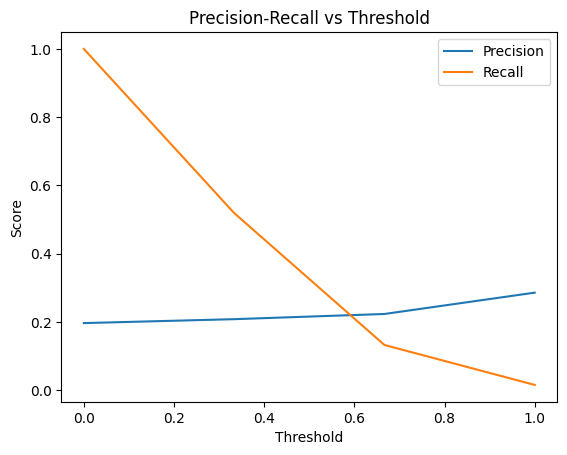

AUC for precison recall: 0.2104090500372562
No threshold found where both precision and recall are >= 0.75.


In [112]:
from sklearn.metrics import precision_recall_curve , auc


# Get predicted probabilities for the positive class (churning)
y_pred_prob = model_knn.predict_proba(X_test_scaled_1)[:, 1]

# Calculate precision and recall for different thresholds
precision, recall, thresholds = precision_recall_curve(y_test_1, y_pred_prob)

# Slice off the last element of precision and recall to match the size of thresholds
precision = precision[:-1]  # Remove last element
recall = recall[:-1]  # Remove last element

# Plot precision-recall curve
plt.plot(thresholds, precision, label='Precision')
plt.plot(thresholds, recall, label='Recall')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.legend()
plt.title('Precision-Recall vs Threshold')
plt.show()

roc_auc = auc(recall, precision)
print("AUC for precison recall:", roc_auc)

# Find the threshold where both precision and recall are reasonably high (e.g., recall >= 0.75 and precision >= 0.75)
threshold_candidates = thresholds[(recall >= 0.80) & (precision >= 0.42)]  # Get thresholds where recall and precision are both high

if len(threshold_candidates) > 0:
    best_threshold = threshold_candidates[0]  # Pick the first threshold that meets the criteria
    print("best_threshold :",best_threshold)

    # Adjust the predictions based on the new threshold
    y_pred_adjusted = (y_pred_prob >= best_threshold).astype(int)

    # Evaluate the model using the new threshold
    from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
    print("Precision at new threshold:", precision_score(y_test_1, y_pred_adjusted))
    print("Recall at new threshold:", recall_score(y_test_1, y_pred_adjusted))
    print("F1 Score at new threshold:", f1_score(y_test_1, y_pred_adjusted))
    print("Confusion Matrix at new threshold:\n", confusion_matrix(y_test_1, y_pred_adjusted))
else:
    print("No threshold found where both precision and recall are >= 0.75.")


#### 🟣 ROC Curve and AUC
ROC-AUC used to evaluate separability. Metrics evaluated at ROC-optimal threshold.

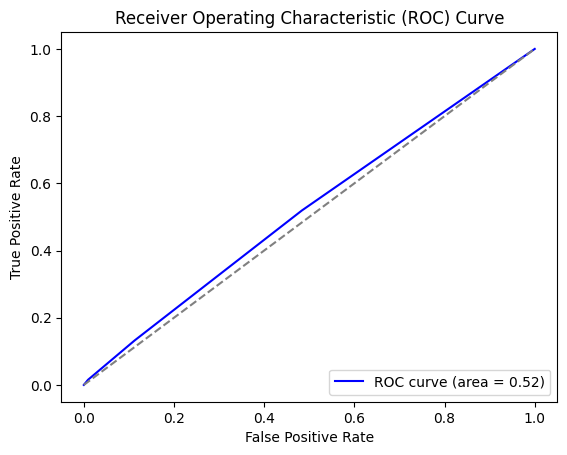

Best threshold based on ROC curve: 0.3333333333333333
AUC 0.5207845447161037
Precision at ROC threshold: 0.20795107033639143
Recall at ROC threshold: 0.5190839694656488
F1 Score at ROC threshold: 0.29694323144104806
Confusion Matrix at ROC threshold:
 [[830 777]
 [189 204]]


In [ ]:
from sklearn.metrics import roc_curve, auc, precision_score, recall_score, f1_score, confusion_matrix

# Get predicted probabilities for the positive class (churning)
y_pred_prob = model_knn.predict_proba(X_test_scaled_1)[:, 1]  # [:, 1] selects the probability for the positive class

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test_1, y_pred_prob)

# Calculate the AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random classifier line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Now, let's find the best threshold based on the ROC curve
# Example: Select the threshold that maximizes (tpr - fpr), or use any other criteria
best_threshold_idx = np.argmax(tpr - fpr)
best_threshold = thresholds[best_threshold_idx]

print("Best threshold based on ROC curve:", best_threshold)

# Adjust the predictions based on the new threshold
y_pred_adjusted_roc = (y_pred_prob >= best_threshold).astype(int)

# Evaluate the model using the new threshold
print("AUC",roc_auc)
print("Precision at ROC threshold:", precision_score(y_test_1, y_pred_adjusted_roc))
print("Recall at ROC threshold:", recall_score(y_test_1, y_pred_adjusted_roc))
print("F1 Score at ROC threshold:", f1_score(y_test_1, y_pred_adjusted_roc))
print("Confusion Matrix at ROC threshold:\n", confusion_matrix(y_test_1, y_pred_adjusted_roc))


### 4.4 -> Model 3:  Descion Tree

#### 🟢 Model Performance (using optimal hyperparameters)

This section implements Decision Tree Model using scikit-learn.Evaluating model performance using classification metrics and prepare for further optimization and threshold tuning.


In [113]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Initialize the model
model_dt = DecisionTreeClassifier(class_weight='balanced',
                               max_depth=25,
                               min_samples_split=6,
                               min_samples_leaf=5,
                               random_state=42)

# Fit the model to the training data
model_dt.fit(X_train_scaled_1,y_train_1)

# Make predictions on the test set
y_test_pred = model_dt.predict(X_test_scaled_1)

# Calculate test accuracy, precision, recall, and F1 score
test_accuracy = accuracy_score(y_test_1, y_test_pred)
test_precision = precision_score(y_test_1, y_test_pred)
test_recall = recall_score(y_test_1, y_test_pred)
test_f1 = f1_score(y_test_1, y_test_pred)

# Print the test metrics
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Precision: {test_precision:.4f}")
print(f"Test Recall: {test_recall:.4f}")
print(f"Test F1 Score: {test_f1:.4f}")

# Confusion matrix for the test set
conf_matrix = confusion_matrix(y_test_1, y_test_pred)
print(f"Confusion Matrix (Test Set):\n{conf_matrix}")

# Cross-validation with Stratified K-Fold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cross_val_accuracy = cross_val_score(model_dt, X_train_scaled_1, y_train_1, cv=cv, scoring='accuracy')

# Print mean cross-validation accuracy
print(f"Mean Cross-validation accuracy: {np.mean(cross_val_accuracy):.4f}")

# Cross-validation precision and recall
y_cv_pred = cross_val_predict(model_dt, X_train_scaled_1, y_train_1, cv=cv)
precision_cv = precision_score(y_train_1, y_cv_pred)
recall_cv = recall_score(y_train_1, y_cv_pred)
f1_cv = f1_score(y_train_1, y_cv_pred)

print(f"Precision from cross-validation: {precision_cv:.4f}")
print(f"Recall from cross-validation: {recall_cv:.4f}")
print(f"F1 Score from cross-validation: {f1_cv:.4f}")


Test Accuracy: 0.7720
Test Precision: 0.4430
Test Recall: 0.6234
Test F1 Score: 0.5180
Confusion Matrix (Test Set):
[[1299  308]
 [ 148  245]]
Mean Cross-validation accuracy: 0.7740
Precision from cross-validation: 0.4643
Recall from cross-validation: 0.6478
F1 Score from cross-validation: 0.5409


GridSearchCV was used to identify the best parameter set for this model and used above. Code is commented below for reference.

In [114]:


                                                 # NOTE: This step was run previously. Due to long runtime, it's commented out here.
                                                        # The final model performance metrics are based on this tuned model.




# from sklearn.model_selection import GridSearchCV
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score

# # Define your parameter grid to search over with more regularization
# param_grid = {
#     'max_depth': [25,26],             # Reduce max_depth to avoid deep trees
#     'min_samples_split': [6,7],     # Increase min_samples_split for less frequent splits
#     'min_samples_leaf': [4,5],      # Increase min_samples_leaf to avoid overfitting leaf nodes
#     'max_features': ['sqrt', 'log2'],   # Use sqrt or log2 to limit the features considered at each split
#     'ccp_alpha': [0.0, 0.001],     # Added pruning parameter, which helps regularize the tree
# }

# # Create a DecisionTreeClassifier
# model = DecisionTreeClassifier(random_state=42)

# # Define a scoring metric: we want to balance precision and recall, so use F1-score
# scorer = make_scorer(f1_score)

# # Initialize GridSearchCV with the DecisionTreeClassifier, parameter grid, and scoring metric
# grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=10, scoring=scorer, n_jobs=-1)

# # Fit the grid search on the training data
# grid_search.fit(X_train_scaled,y_train)

# # Print the best parameters
# print("Best parameters found: ", grid_search.best_params_)

# # Get the best estimator
# best_rf_model = grid_search.best_estimator_

# # Check precision and recall for the best model on the test set
# y_pred = best_rf_model.predict(X_test_scaled_1)
# precision = precision_score(y_test_1, y_pred)
# recall = recall_score(y_test_1, y_pred)

# print("Best Precision:", precision)
# print("Best Recall:", recall)

# # Check for overfitting: Compare training and test performance
# train_score = best_rf_model.score(X_train_scaled_1,y_train_1)  # Accuracy on training set
# test_score = best_rf_model.score(X_test_scaled_1, y_test_1)  # Accuracy on test set

# print("Training score:", train_score)
# print("Test score:", test_score)


#### 🟢 Precision-Recall Curve and Threshold-Level Error Tradeoff


Precision-recall curve used to identify optimal threshold that balances recall ≥ 0.80 and precision ≥ 0.40, Confusion matrix and F1 score computed at the same  threshold.

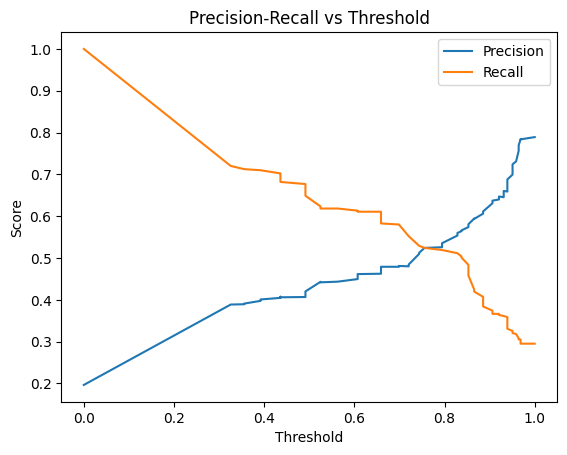

No threshold found where both precision and recall are >= 0.75.


In [115]:
from sklearn.metrics import precision_recall_curve


# Get predicted probabilities for the positive class (churning)
y_pred_prob = model_dt.predict_proba(X_test_scaled_1)[:, 1]

# Calculate precision and recall for different thresholds
precision, recall, thresholds = precision_recall_curve(y_test_1, y_pred_prob)

# Slice off the last element of precision and recall to match the size of thresholds
precision = precision[:-1]  # Remove last element
recall = recall[:-1]  # Remove last element

# Plot precision-recall curve
plt.plot(thresholds, precision, label='Precision')
plt.plot(thresholds, recall, label='Recall')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.legend()
plt.title('Precision-Recall vs Threshold')
plt.show()

# Find the threshold where both precision and recall are reasonably high (e.g., recall >= 0.75 and precision >= 0.75)
threshold_candidates = thresholds[(recall >= 0.8) & (precision >= 0.4)]  # Get thresholds where recall and precision are both high

if len(threshold_candidates) > 0:
    best_threshold = threshold_candidates[0]  # Pick the first threshold that meets the criteria
    print("Best threshold for recall >= 0.60 and precision >= 0.40:", best_threshold)

    # Adjust the predictions based on the new threshold
    y_pred_adjusted = (y_pred_prob >= best_threshold).astype(int)

    # Evaluate the model using the new threshold
    from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
    print("Precision at new threshold:", precision_score(y_test_1, y_pred_adjusted))
    print("Recall at new threshold:", recall_score(y_test_1, y_pred_adjusted))
    print("F1 Score at new threshold:", f1_score(y_test_1, y_pred_adjusted))
    print("Confusion Matrix at new threshold:\n", confusion_matrix(y_test_1, y_pred_adjusted))
else:
    print("No threshold found where both precision and recall are >= 0.75.")


#### 🟢 ROC Curve and AUC
ROC-AUC used to evaluate separability. Metrics evaluated at ROC-optimal threshold.

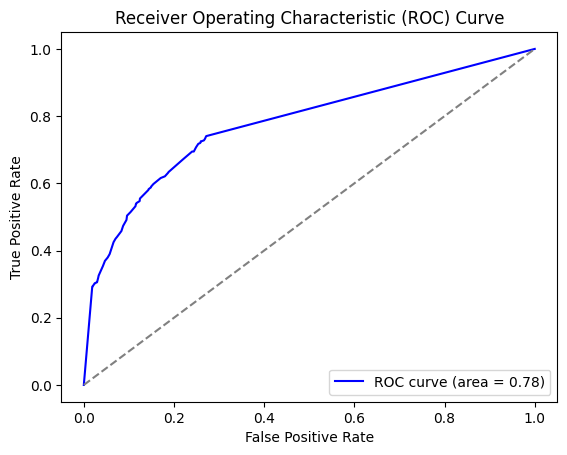

Best threshold based on ROC curve: 0.3258150502358007
Precision at ROC threshold: 0.40027510316368636
Recall at ROC threshold: 0.7404580152671756
F1 Score at ROC threshold: 0.5196428571428572
Confusion Matrix at ROC threshold:
 [[1171  436]
 [ 102  291]]


In [ ]:
from sklearn.metrics import roc_curve, auc, precision_score, recall_score, f1_score, confusion_matrix

# Get predicted probabilities for the positive class (churning)
y_pred_prob = model_dt.predict_proba(X_test_scaled_1)[:, 1]  # [:, 1] selects the probability for the positive class

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test_1, y_pred_prob)

# Calculate the AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random classifier line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Now, let's find the best threshold based on the ROC curve
# Example: Select the threshold that maximizes (tpr - fpr), or use any other criteria
best_threshold_idx = np.argmax(tpr - fpr)
best_threshold = thresholds[best_threshold_idx]

print("Best threshold based on ROC curve:", best_threshold)

# Adjust the predictions based on the new threshold
y_pred_adjusted_roc = (y_pred_prob >= best_threshold).astype(int)

# Evaluate the model using the new threshold
print("Precision at ROC threshold:", precision_score(y_test_1, y_pred_adjusted_roc))
print("Recall at ROC threshold:", recall_score(y_test_1, y_pred_adjusted_roc))
print("F1 Score at ROC threshold:", f1_score(y_test_1, y_pred_adjusted_roc))
print("Confusion Matrix at ROC threshold:\n", confusion_matrix(y_test_1, y_pred_adjusted_roc))


###  4.4 -> Model 4:  Random Forest

#### 🔹 Model Performance (using optimal hyperparameters)

This section implements Random Forest Model using scikit-learn.Evaluating model performance using classification metrics and prepare for further optimization and threshold tuning.


In [92]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score, confusion_matrix, classification_report
import numpy as np
from sklearn.model_selection import StratifiedKFold

# Initialize the model
model_rf = RandomForestClassifier(n_estimators=400,
                               class_weight='balanced',
                               max_depth=25,
                               min_samples_split=4,
                               min_samples_leaf=6,
                               random_state=42)

# Best parameters found:  {'class_weight': 'balanced', 'max_depth': 25,
# 'min_samples_leaf': 6, 'min_samples_split': 4, 'n_estimators': 400}


# Fit the model to the training data
model_rf.fit(X_train_scaled_1,y_train_1)

# Make predictions on the test set
y_test_pred = model_rf.predict(X_test_scaled_1)

# Calculate test accuracy, precision, recall, and F1 score
test_accuracy = accuracy_score(y_test_1, y_test_pred)
test_precision = precision_score(y_test_1, y_test_pred)
test_recall = recall_score(y_test_1, y_test_pred)
test_f1 = f1_score(y_test_1, y_test_pred)

# Print the test metrics
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Precision: {test_precision:.4f}")
print(f"Test Recall: {test_recall:.4f}")
print(f"Test F1 Score: {test_f1:.4f}")

# Confusion matrix for the test set
conf_matrix = confusion_matrix(y_test_1, y_test_pred)
print(f"Confusion Matrix (Test Set):\n{conf_matrix}")

# Cross-validation with Stratified K-Fold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cross_val_accuracy = cross_val_score(model_rf, X_train_scaled_1, y_train_1, cv=cv, scoring='accuracy')

# Print mean cross-validation accuracy
print(f"Mean Cross-validation accuracy: {np.mean(cross_val_accuracy):.4f}")

# Cross-validation precision and recall
y_cv_pred = cross_val_predict(model_rf, X_train_scaled_1, y_train_1, cv=cv)
precision_cv = precision_score(y_train_1, y_cv_pred)
recall_cv = recall_score(y_train_1, y_cv_pred)
f1_cv = f1_score(y_train_1, y_cv_pred)

print(f"Precision from cross-validation: {precision_cv:.4f}")
print(f"Recall from cross-validation: {recall_cv:.4f}")
print(f"F1 Score from cross-validation: {f1_cv:.4f}")

Test Accuracy: 0.8445
Test Precision: 0.5911
Test Recall: 0.6768
Test F1 Score: 0.6311
Confusion Matrix (Test Set):
[[1423  184]
 [ 127  266]]
Mean Cross-validation accuracy: 0.8360
Precision from cross-validation: 0.5918
Recall from cross-validation: 0.6509
F1 Score from cross-validation: 0.6199


GridSearchCV was used to identify the best parameter set for this model and used above. Code is commented below for reference.

In [50]:

                                                         # NOTE: This step was run previously. Due to long runtime, it's commented out here.
                                                              # The final model performance metrics are based on this tuned model.



# from sklearn.model_selection import GridSearchCV
# from sklearn.ensemble import RandomForestClassifier

# # Define the parameter grid to search
# param_grid = {
#     'n_estimators': [200, 300, 400],        # Number of trees
#     'max_depth': [15, 25, 30, 40],       # Max depth of each tree
#     'min_samples_split': [4, 6, 8],       # Minimum samples to split a node
#     'min_samples_leaf': [4, 6, 10],       # Minimum samples at each leaf node
#     # 'max_features': ['log2', 'sqrt', 10],    # Number of features to consider for each split
#     'class_weight': ['balanced', 'balanced_subsample']  # Handling class imbalance
# }

# # Create the model
# rf = RandomForestClassifier(random_state=42)

# # Set up GridSearchCV with 5-fold cross-validation
# grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='f1')

# # Fit the grid search
# grid_search.fit(X_train_1, y_train_1)

# # Get the best parameters and estimator
# print("Best parameters found: ", grid_search.best_params_)
# print("Best F1 Score from Grid Search: ", grid_search.best_score_)

# # Get the best model and evaluate on the test set
# best_rf_model = grid_search.best_estimator_
# y_pred = best_rf_model.predict(X_test)

# # Print the test performance
# from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
# print(f"Test Precision: {precision_score(y_test, y_pred)}")
# print(f"Test Recall: {recall_score(y_test, y_pred)}")
# print(f"Test F1 Score: {f1_score(y_test, y_pred)}")
# print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


In [51]:
# Fitting 5 folds for each of 216 candidates, totalling 1080 fits
# Best parameters found:  {'class_weight': 'balanced', 'max_depth': 25, 'min_samples_leaf': 6, 'min_samples_split': 4, 'n_estimators': 400}
# Best F1 Score from Grid Search:  0.6372827533887747
# Test Precision: 0.6144859813084113
# Test Recall: 0.6692111959287532
# Test F1 Score: 0.6406820950060901
# Confusion Matrix:
#  [[1442  165]
#  [ 130  263]]

#### 🔹 ROC Curve and AUC
ROC-AUC used to evaluate separability. Metrics evaluated at ROC-optimal threshold.

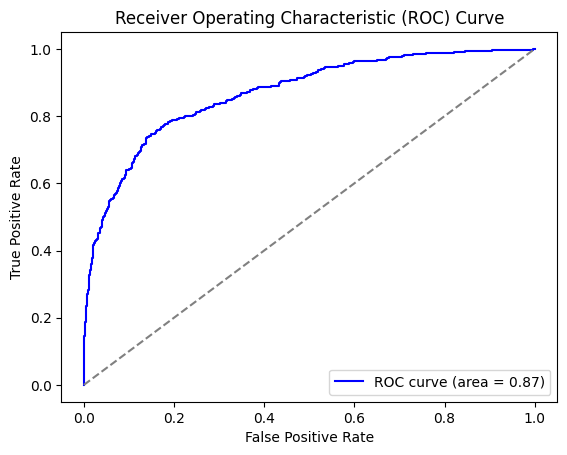

Best threshold based on ROC curve: 0.4570588971354168
AUC 0.8678222344672084
Precision at ROC threshold: 0.562015503875969
Recall at ROC threshold: 0.7379134860050891
F1 Score at ROC threshold: 0.6380638063806381
Confusion Matrix at ROC threshold:
 [[1381  226]
 [ 103  290]]


In [99]:
from sklearn.metrics import roc_curve, auc, precision_score, recall_score, f1_score, confusion_matrix

# Get predicted probabilities for the positive class (churning)
y_pred_prob = model_rf.predict_proba(X_test_1)[:, 1]  # [:, 1] selects the probability for the positive class

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test_1, y_pred_prob)

# Calculate the AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random classifier line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Now, let's find the best threshold based on the ROC curve
# Example: Select the threshold that maximizes (tpr - fpr), or use any other criteria
best_threshold_idx = np.argmax(tpr - fpr)
best_threshold = thresholds[best_threshold_idx]

print("Best threshold based on ROC curve:", best_threshold)

# Adjust the predictions based on the new threshold
y_pred_adjusted_roc = (y_pred_prob >= best_threshold).astype(int)

# Evaluate the model using the new threshold
print("AUC",roc_auc)
print("Precision at ROC threshold:", precision_score(y_test_1, y_pred_adjusted_roc))
print("Recall at ROC threshold:", recall_score(y_test_1, y_pred_adjusted_roc))
print("F1 Score at ROC threshold:", f1_score(y_test_1, y_pred_adjusted_roc))
print("Confusion Matrix at ROC threshold:\n", confusion_matrix(y_test_1, y_pred_adjusted_roc))


#### 🔹 Precision-Recall Curve and Threshold-Level Error Tradeoff


Precision-recall curve used to identify optimal threshold that balances recall ≥ 0.80 and precision ≥ 0.40, Confusion matrix and F1 score computed at the same  threshold.


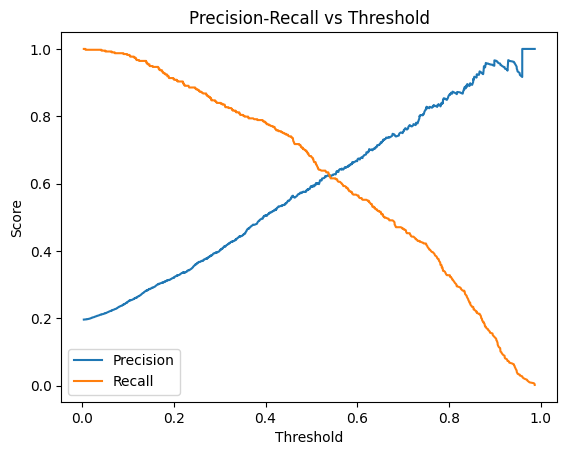

AUC for precison recall: 0.6910175667975494
Best threshold for recall >= 0.80 and precision >= 0.42: 0.3179342359116946
Precision at new threshold: 0.4204398447606727
Recall at new threshold: 0.8269720101781171
F1 Score at new threshold: 0.5574614065180102
Confusion Matrix at new threshold:
 [[1159  448]
 [  68  325]]


In [94]:
from sklearn.metrics import precision_recall_curve , auc


# Get predicted probabilities for the positive class (churning)
y_pred_prob = model_rf.predict_proba(X_test_1)[:, 1]

# Calculate precision and recall for different thresholds
precision, recall, thresholds = precision_recall_curve(y_test_1, y_pred_prob)

# Slice off the last element of precision and recall to match the size of thresholds
precision = precision[:-1]  # Remove last element
recall = recall[:-1]  # Remove last element



# Plot precision-recall curve
plt.plot(thresholds, precision, label='Precision')
plt.plot(thresholds, recall, label='Recall')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.legend()
plt.title('Precision-Recall vs Threshold')
plt.show()

# Find the threshold where both precision and recall are reasonably high (e.g., recall >= 0.75 and precision >= 0.75)
threshold_candidates = thresholds[(recall >= 0.80) & (precision >= 0.42)]  # Get thresholds where recall and precision are both high

# are under curve
roc_auc = auc(recall, precision)
print("AUC for precison recall:", roc_auc)

if len(threshold_candidates) > 0:
    best_threshold = threshold_candidates[0]  # Pick the first threshold that meets the criteria
    print("Best threshold for recall >= 0.80 and precision >= 0.42:", best_threshold)

    # Adjust the predictions based on the new threshold
    y_pred_adjusted = (y_pred_prob >= best_threshold).astype(int)

    # Evaluate the model using the new threshold
    from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
    print("Precision at new threshold:", precision_score(y_test_1, y_pred_adjusted))
    print("Recall at new threshold:", recall_score(y_test_1, y_pred_adjusted))
    print("F1 Score at new threshold:", f1_score(y_test_1, y_pred_adjusted))
    print("Confusion Matrix at new threshold:\n", confusion_matrix(y_test_1, y_pred_adjusted))
else:
    print("No threshold found where both precision and recall are >= 0.75.")


                                           `Threshold-Level Error Tradeoff`

   Threshold  False Positives  False Negatives  Precision    Recall
0       0.48              206              115   0.574380  0.707379
1       0.47              215              111   0.567404  0.717557
2       0.46              223              107   0.561886  0.727735
3       0.45              239              102   0.549057  0.740458
4       0.44              254               98   0.537341  0.750636
5       0.43              261               96   0.532258  0.755725
6       0.42              276               93   0.520833  0.763359
7       0.41              286               89   0.515254  0.773537
8       0.40              300               86   0.505766  0.781170
9       0.39              316               83   0.495208  0.788804


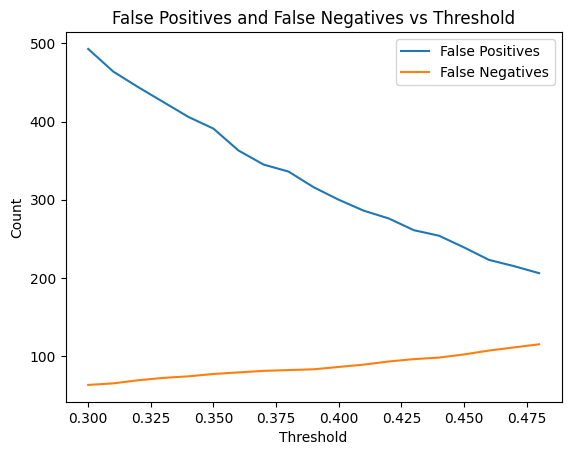

In [53]:
from sklearn.metrics import confusion_matrix

# Get predicted probabilities for the positive class (churn)
y_pred_prob = model_rf.predict_proba(X_test_scaled_1)[:, 1]

# List to store the results of false positives and false negatives
thresholds_list = np.arange(0.48, 0.29, -0.01)  # Thresholds from 0.48 to 0.30
results = []

# Loop through thresholds from 0.48 to 0.30
for threshold in thresholds_list:
    # Adjust the threshold and make predictions
    y_pred_adjusted = (y_pred_prob >= threshold).astype(int)

    # Calculate the confusion matrix
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred_adjusted).ravel()  # Extract FP and FN
    precision = (tp) / (tp + fp) if tp + fp > 0 else 0  # Prevent division by zero
    recall = (tp) / (tp + fn) if tp + fn > 0 else 0  # Prevent division by zero

    # Store the results in the list
    results.append({
        'Threshold': threshold,
        'False Positives': fp,
        'False Negatives': fn,
        'Precision': precision,
        'Recall': recall
    })

# Convert results into a DataFrame for easy analysis (optional)
import pandas as pd
results_df = pd.DataFrame(results)

# Print the results
print(results_df.head(10))

# Plot False Positives and False Negatives against the threshold to visually inspect the change
import matplotlib.pyplot as plt
plt.plot(results_df['Threshold'], results_df['False Positives'], label='False Positives')
plt.plot(results_df['Threshold'], results_df['False Negatives'], label='False Negatives')
plt.xlabel('Threshold')
plt.ylabel('Count')
plt.title('False Positives and False Negatives vs Threshold')
plt.legend()
plt.show()


In [ ]:
# Get predicted probabilities for the positive class (churn)
y_pred_prob = model_rf.predict_proba(X_test_1)[:, 1]

# Set a custom threshold (e.g., 0.4 instead of 0.5)
threshold =  0.365123011190602
y_pred_adjusted = (y_pred_prob >= threshold).astype(int)

# Evaluate metrics at the new threshold
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
print("Precision:", precision_score(y_test, y_pred_adjusted))
print("Recall:", recall_score(y_test, y_pred_adjusted))
print("F1 Score:", f1_score(y_test, y_pred_adjusted))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_adjusted))

Precision: 0.47023809523809523
Recall: 0.8040712468193384
F1 Score: 0.5934272300469483
Confusion Matrix:
 [[1251  356]
 [  77  316]]


Which threshold is better?

For a balance of precision and recall, it seems that the 0.40 threshold might be the best option. It gives you a decent precision of 50.75% and a recall of 77.61%.


Conclusion:
Threshold 0.40 or 0.44 are likely your best options for balancing precision and recall in a reasonable way. If you need to minimize false positives (for example, in fraud detection or churn prediction), you might consider using the threshold around 0.40 to 0.45 range.

 it seems that SMOTE isn't adding much value. Both the precision, recall, and F1 score remain almost identical, suggesting that the model is already handling the class imbalance reasonably well without the need for synthetic data generation.

#### 🔹 Feature Importance

Top contributing features identified by the model’s importance scores.


In [ ]:
# Get the feature importance
importances = model_rf.feature_importances_

# dataframe of features and feature importances
imp=pd.DataFrame({'Feature':X1.columns,'Importance':importances})
imp.sort_values(by='Importance',ascending=False)

,Feature,Importance
2,Age,0.311462
5,NumOfProducts,0.182057
4,Balance,0.127232
8,EstimatedSalary,0.094593
0,CreditScore,0.089937
3,Tenure,0.052837
7,IsActiveMember,0.052341
10,Germany,0.037638
1,Gender,0.023997
9,France,0.016166


### 4.5 -> Model 5: XgBoost

#### 🔶 Model Performance (using optimal hyperparameters)

This section implements Random Forest Model using scikit-learn.Evaluating model performance using classification metrics and prepare for further optimization and threshold tuning.


In [95]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler



# Initialize the XGBoost model
model_xgb = xgb.XGBClassifier(
    objective='binary:logistic',  # For binary classification
    eval_metric='logloss',
    learning_rate=0.05,
    max_depth=11,
    min_child_weight=9,
    n_estimators=220,
    subsample=0.9,
    colsample_bytree=0.8,
    scale_pos_weight=sum(y_train == 0) / sum(y_train == 1),  # Handle class imbalance
    random_state=42
)


# Fit the model to the training data
model_xgb.fit(X_train_scaled_1,y_train_1)

# Make predictions on the test set
y_test_pred = model_xgb.predict(X_test_scaled_1)

# Calculate test accuracy, precision, recall, and F1 score
test_accuracy = accuracy_score(y_test_1, y_test_pred)
test_precision = precision_score(y_test_1, y_test_pred)
test_recall = recall_score(y_test_1, y_test_pred)
test_f1 = f1_score(y_test_1, y_test_pred)

# Print the test metrics
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Precision: {test_precision:.4f}")
print(f"Test Recall: {test_recall:.4f}")
print(f"Test F1 Score: {test_f1:.4f}")

# Confusion matrix for the test set
conf_matrix = confusion_matrix(y_test_1, y_test_pred)
print(f"Confusion Matrix (Test Set):\n{conf_matrix}")

# Cross-validation with Stratified K-Fold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cross_val_accuracy = cross_val_score(model_xgb, X_train_scaled_1, y_train_1, cv=cv, scoring='accuracy')

# Print mean cross-validation accuracy
print(f"Mean Cross-validation accuracy: {np.mean(cross_val_accuracy):.4f}")

# Cross-validation precision and recall
y_cv_pred = cross_val_predict(model_xgb, X_train_scaled_1, y_train_1, cv=cv)
precision_cv = precision_score(y_train_1, y_cv_pred)
recall_cv = recall_score(y_train_1, y_cv_pred)
f1_cv = f1_score(y_train_1, y_cv_pred)

print(f"Precision from cross-validation: {precision_cv:.4f}")
print(f"Recall from cross-validation: {recall_cv:.4f}")
print(f"F1 Score from cross-validation: {f1_cv:.4f}")


Test Accuracy: 0.8370
Test Precision: 0.5724
Test Recall: 0.6743
Test F1 Score: 0.6192
Confusion Matrix (Test Set):
[[1409  198]
 [ 128  265]]
Mean Cross-validation accuracy: 0.8288
Precision from cross-validation: 0.5759
Recall from cross-validation: 0.6320
F1 Score from cross-validation: 0.6027


In [80]:
# # not scaled

# Test Accuracy: 0.8395
# Test Precision: 0.5789
# Test Recall: 0.6718
# Test F1 Score: 0.6219
# Confusion Matrix (Test Set):
# [[1415  192]
#  [ 129  264]]
# Mean Cross-validation accuracy: 0.8274
# Precision from cross-validation: 0.5719
# Recall from cross-validation: 0.6363
# F1 Score from cross-validation: 0.6024

# above is scaled data , scaling has no affect on the model

GridSearchCV was used to identify the best parameter set for this model and used above. Code is commented below for reference.

In [81]:

                                                                     # NOTE: This step was run previously. Due to long runtime, it's commented out here.
                                                                     # The final model performance metrics are based on this tuned model.






# import xgboost as xgb
# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import make_scorer, f1_score
# from sklearn.model_selection import StratifiedKFold

# # Assuming X_train_scaled and y_train are already defined

# # Initialize XGBoost model
# xgb_model = xgb.XGBClassifier(
#     objective='binary:logistic',
#     eval_metric='logloss',
#     random_state=42
# )

# # Create a parameter grid for hyperparameter tuning
# param_grid = {
#     'learning_rate': [0.05, 0.1],
#     'max_depth': [12,13],
#     'min_child_weight': [ 6, 9],
#     'subsample': [0.8, 0.9],
#     'n_estimators': [220,250]  # Number of trees
# }

# # Create Stratified KFold cross-validation object
# cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# # Create GridSearchCV object, optimizing for F1 score
# grid_search = GridSearchCV(
#     estimator=xgb_model,
#     param_grid=param_grid,
#     scoring=make_scorer(f1_score),  # Optimize for F1 score
#     cv=cv,
#     verbose=1,
#     n_jobs=-1
# )

# # Fit the model to the training data
# grid_search.fit(X_train_scaled, y_train)

# # Get the best parameters and score from the grid search
# print("Best parameters found: ", grid_search.best_params_)
# print("Best F1 score: ", grid_search.best_score_)

# # Make predictions with the best model on the test set
# best_model = grid_search.best_estimator_
# y_test_pred = best_model.predict(X_test_scaled)

# # Calculate F1 score on the test set
# test_f1 = f1_score(y_test, y_test_pred)

# # Print test metrics
# print(f"Test F1 Score: {test_f1:.4f}")

# # Confusion matrix for the test set
# conf_matrix = confusion_matrix(y_test, y_test_pred)
# print(f"Confusion Matrix (Test Set):\n{conf_matrix}")


#### 🔶 ROC Curve and AUC
ROC-AUC used to evaluate separability. Metrics evaluated at ROC-optimal threshold.


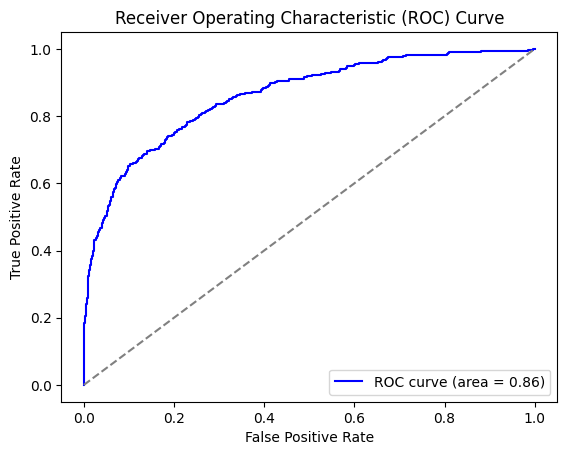

Best threshold based on ROC curve: 0.45457742
AUC 0.8611307717033145
Precision at ROC threshold: 0.548
Recall at ROC threshold: 0.6972010178117048
F1 Score at ROC threshold: 0.6136618141097424
Confusion Matrix at ROC threshold:
 [[1381  226]
 [ 119  274]]


In [100]:
from sklearn.metrics import roc_curve, auc, precision_score, recall_score, f1_score, confusion_matrix

# Get predicted probabilities for the positive class (churning)
y_pred_prob = model_xgb.predict_proba(X_test_scaled_1)[:, 1]  # [:, 1] selects the probability for the positive class

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test_1, y_pred_prob)

# Calculate the AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random classifier line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Now, let's find the best threshold based on the ROC curve
# Example: Select the threshold that maximizes (tpr - fpr), or use any other criteria
best_threshold_idx = np.argmax(tpr - fpr)
best_threshold = thresholds[best_threshold_idx]

print("Best threshold based on ROC curve:", best_threshold)

# Adjust the predictions based on the new threshold
y_pred_adjusted_roc = (y_pred_prob >= best_threshold).astype(int)

# Evaluate the model using the new threshold
print("AUC",roc_auc)
print("Precision at ROC threshold:", precision_score(y_test_1, y_pred_adjusted_roc))
print("Recall at ROC threshold:", recall_score(y_test_1, y_pred_adjusted_roc))
print("F1 Score at ROC threshold:", f1_score(y_test_1, y_pred_adjusted_roc))
print("Confusion Matrix at ROC threshold:\n", confusion_matrix(y_test_1, y_pred_adjusted_roc))


#### 🔶 Precision-Recall Curve and Threshold-Level Error Tradeoff


Precision-recall curve used to identify optimal threshold that balances recall ≥ 0.80 and precision ≥ 0.40, Confusion matrix and F1 score computed at the same  threshold.

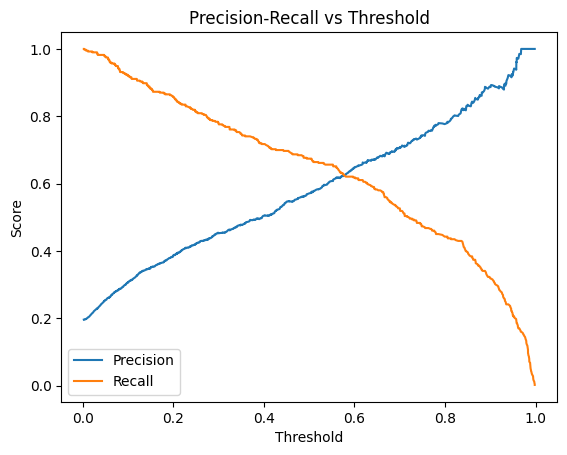

AUC for precison recall: 0.6939035066663527
Best threshold for recall >= 0.80 and precision >= 0.42: 0.24865806
Precision at new threshold: 0.4201570680628272
Recall at new threshold: 0.816793893129771
F1 Score at new threshold: 0.5548833189282627
Confusion Matrix at new threshold:
 [[1164  443]
 [  72  321]]


In [96]:
from sklearn.metrics import precision_recall_curve , auc


# Get predicted probabilities for the positive class (churning)
y_pred_prob = model_xgb.predict_proba(X_test_scaled_1)[:, 1]

# Calculate precision and recall for different thresholds
precision, recall, thresholds = precision_recall_curve(y_test_1, y_pred_prob)

# Slice off the last element of precision and recall to match the size of thresholds
precision = precision[:-1]  # Remove last element
recall = recall[:-1]  # Remove last element


# Plot precision-recall curve
plt.plot(thresholds, precision, label='Precision')
plt.plot(thresholds, recall, label='Recall')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.legend()
plt.title('Precision-Recall vs Threshold')
plt.show()

# Find the threshold where both precision and recall are reasonably high (e.g., recall >= 0.75 and precision >= 0.75)
threshold_candidates = thresholds[(recall >= 0.80) & (precision >= 0.42)]  # Get thresholds where recall and precision are both high

# are under curve
roc_auc = auc(recall, precision)
print("AUC for precison recall:", roc_auc)

if len(threshold_candidates) > 0:
    best_threshold = threshold_candidates[0]  # Pick the first threshold that meets the criteria
    print("Best threshold for recall >= 0.80 and precision >= 0.42:", best_threshold)

    # Adjust the predictions based on the new threshold
    y_pred_adjusted = (y_pred_prob >= best_threshold).astype(int)

    # Evaluate the model using the new threshold
    from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
    print("Precision at new threshold:", precision_score(y_test_1, y_pred_adjusted))
    print("Recall at new threshold:", recall_score(y_test_1, y_pred_adjusted))
    print("F1 Score at new threshold:", f1_score(y_test_1, y_pred_adjusted))
    print("Confusion Matrix at new threshold:\n", confusion_matrix(y_test_1, y_pred_adjusted))
else:
    print("No threshold found where both precision and recall are >= 0.75.")


   Threshold  False Positives  False Negatives  Precision    Recall
0       0.48              212              124   0.559252  0.684478
1       0.47              218              123   0.553279  0.687023
2       0.46              225              122   0.546371  0.689567
3       0.45              227              119   0.546906  0.697201
4       0.44              241              118   0.532946  0.699746


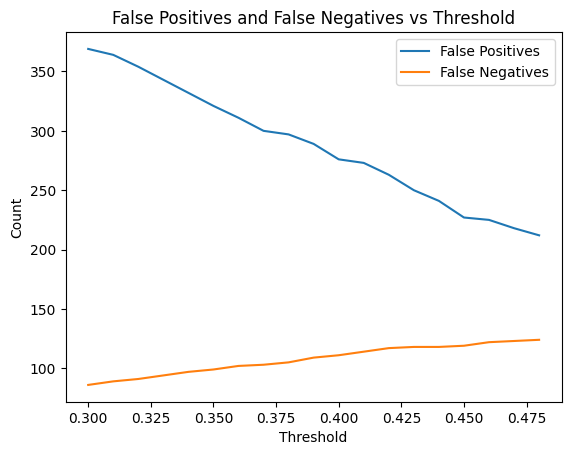

In [108]:
import numpy as np
from sklearn.metrics import confusion_matrix

# Get predicted probabilities for the positive class (churn)
y_pred_prob = model_xgb.predict_proba(X_test_scaled_1)[:, 1]

# List to store the results of false positives and false negatives
thresholds_list = np.arange(0.48, 0.29, -0.01)  # Thresholds from 0.48 to 0.30
results = []

# Loop through thresholds from 0.48 to 0.30
for threshold in thresholds_list:
    # Adjust the threshold and make predictions
    y_pred_adjusted = (y_pred_prob >= threshold).astype(int)

    # Calculate the confusion matrix
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred_adjusted).ravel()  # Extract FP and FN
    precision = (tp) / (tp + fp) if tp + fp > 0 else 0  # Prevent division by zero
    recall = (tp) / (tp + fn) if tp + fn > 0 else 0  # Prevent division by zero

    # Store the results in the list
    results.append({
        'Threshold': threshold,
        'False Positives': fp,
        'False Negatives': fn,
        'Precision': precision,
        'Recall': recall
    })

# Convert results into a DataFrame for easy analysis (optional)
import pandas as pd
results_df = pd.DataFrame(results)

# Print the results
print(results_df.head(5))

# Plot False Positives and False Negatives against the threshold to visually inspect the change
import matplotlib.pyplot as plt
plt.plot(results_df['Threshold'], results_df['False Positives'], label='False Positives')
plt.plot(results_df['Threshold'], results_df['False Negatives'], label='False Negatives')
plt.xlabel('Threshold')
plt.ylabel('Count')
plt.title('False Positives and False Negatives vs Threshold')
plt.legend()
plt.show()


## 5. Model Comparison & Selection Summary



Model Selection Criteria
While multiple classification models were explored (Logistic Regression, Decision Tree, KNN, Random Forest, XGBoost), only the top three performers were selected based on both predictive performance and ability to balance recall and precision:

Logistic Regression: Strong interpretability, solid baseline performance

Random Forest: Robust generalization and balance

XGBoost: Top performance with best recall-precision trade-off

📊 Performance at Default Thresholds

In [102]:
summary1 = {
    'Model': ['Logistic Regression', 'Random Forest', 'XGBoost'],
    'Accuracy': ['76.5%', '84.45%', '83.7%'],
    'Precision': [0.44, 0.59, 0.57],
    'Recall': [0.77, 0.67, 0.67],
    'F1 Score': [0.56, 0.63, 0.62],
    'AUC-ROC': [0.84, 0.87, 0.86]
}

df_summ1 = pd.DataFrame(summary1)
display(df_summ1)

,Model,Accuracy,Precision,Recall,F1 Score,AUC-ROC
0,Logistic Regression,76.5%,0.44,0.77,0.56,0.84
1,Random Forest,84.45%,0.59,0.67,0.63,0.87
2,XGBoost,83.7%,0.57,0.67,0.62,0.86


🎯 Performance at Optimized Thresholds

In [107]:

data = [
    {'Model': 'Logistic Regression', 'Threshold': 0.463, 'Precision': 0.420, 'Recall': 0.807, 'F1 Score': 0.553,'AUC-PR':0.60},
    {'Model': 'Random Forest', 'Threshold': 0.318, 'Precision': 0.420, 'Recall': 0.827, 'F1 Score': 0.557,'AUC-PR':0.69},
    {'Model': 'XGBoost', 'Threshold': 0.249, 'Precision': 0.420, 'Recall': 0.817, 'F1 Score': 0.555,'AUC-PR':0.69}
]


threshold_df = pd.DataFrame(data)

threshold_df


,Model,Threshold,Precision,Recall,F1 Score,AUC-PR
0,Logistic Regression,0.463,0.42,0.807,0.553,0.60
1,Random Forest,0.318,0.42,0.827,0.557,0.69
2,XGBoost,0.249,0.42,0.817,0.555,0.69


 Threshold Selection Criteria

 `Thresholds chosen to ensure Recall ≥ 0.80 and Precision ≥ 0.42`

In churn prediction, Recall is often more critical than Precision — we want to identify as many customers likely to churn as possible, even at the cost of some false positives.

However, high recall alone can flood the business with too many false alarms. So, to keep the predictions actionable, a minimum Precision of 42% was set — meaning at least 4 out of 10 flagged customers are actual churners.

The threshold of (Recall ≥ 0.80 and Precision ≥ 0.42) was selected because:

Recall ≥ 0.80 ensures we’re identifying at least 80% of potential churners, minimizing lost customers.

Precision ≥ 0.42 ensures that the results remain operationally practical — avoiding wasteful outreach to too many non-churners.

Logistic Regression's highest valid threshold to meet this was chosen to maintain model confidence.

This trade-off ensures a balanced and business-relevant decision point between model performance and real-world usability.


🏁 Conclusion Summary

While all three models were optimized to meet a recall threshold of 80% and a minimum precision of 42%, `Random Forest` emerged as the top performer both at default and tuned thresholds, offering the best trade-off between identifying churners and minimizing false positives.

## Cinclusion & Insights

📌 Final Summary: Data-Driven Insights & Predictive Support for Churn Mitigation


This analysis aimed to uncover key behavioral and demographic patterns behind customer churn using data exploration and interpretable modeling. The project blended EDA, feature engineering, and logistic modeling to drive both insights and decision support.

🧠 Key Behavioral Insights

- Inactivity is a major churn driver:
In Germany, customers aged 40–55 who were inactive showed 63% higher churn, despite activity being balanced overall.

- Product ownership matters:
Customers with just 1 product accounted for nearly 70% of all churners, while those with 2 products had a significantly lower churn rate.

- Demographics show strong effects:

   Age is highly predictive — churn odds double for every ~10-year increase.

   German customers are more likely to churn than those in France or Spain.

Other behavioral factors like credit card ownership or salary did not show strong correlation with churn in this dataset.


🧪 Predictive Modeling Insights

To complement EDA, logistic regression and tree-based models (Random Forest, XGBoost) were tested.
Rather than aiming for maximum accuracy, these models were used to:

- Validate key patterns found in EDA

- Quantify feature importance and risk factors

- Experiment with recall-focused thresholds, prioritizing the capture of likely churners

Top performers (Random Forest & XGBoost) achieved:

Recall > 80% & Precision > 42% at optimized thresholds — making them suitable for early churn detection.


✔💰⚡While advanced ML models were tested, the strength of this project lies in its blend of explainable insights and strategic thinking. The goal was not just prediction — but actionable understanding.

This structure reflects the real-world balance between data science and business value:
Find the signal, quantify it, and act on it.